# Importing Libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# import 'Seaborn' 
import seaborn as sns
import scipy.stats as stats

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder 
from imblearn.over_sampling import SMOTE

# import various functions from sklearn 
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,cohen_kappa_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold


from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

import  warnings
warnings.filterwarnings("ignore")

from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# Title: Bank Marketing

### Business Problem
There has been a revenue decline for the Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing effort on such clients.

To resolve the proble, we suggest a classification approach to predict which clients are more likely to subscribe for term deposits.

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required,in order to access if the product (bank term deposit) would be (or not) subscribed.
The classification goal is to predict if the client will subscribe a term deposit (variable y).

Age group: 

10 - 19 = 1

20 - 29 = 2

30 - 39 = 3

40 - 49 = 4

50 - 59 = 5

60 - 69 = 6

70 - 79 = 7

80 - 89 = 8

90 - 99 = 9

1 - age (numeric)

2 - job : type of job (categorical:"admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") 
 
3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
 
4 - education (categorical: "unknown","secondary","primary","tertiary")
 
5 - default: has credit in default? (binary: "yes","no")
   
6 - balance: average yearly balance, in euros (numeric)
   
7 - housing: has housing loan? (binary: "yes","no")
   
8 - loan: has personal loan? (binary: "yes","no")
   
#related with the last contact of the current campaign:
    
9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 

10 - day: last contact day of the month (numeric)
  
11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
12 - duration: last contact duration, in seconds (numeric).

Important note:  This attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
  
#other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
16 - poutcome: outcome of the previous marketing campaign (categorical:"unknown","other","failure","success")

Output variable (desired target):
  
17 - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 

In [2]:
df = pd.read_csv('Bank_Data.csv')
df.head()

,age,job,nuptial,education,defaulter_presence,balance_amount,house_loan,personal_loan,contact_via,last_contact_day,last_contact_month,duration,campaign,passed_days,previous_contact,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 45211 non-null  int64 
 1   job                 45211 non-null  object
 2   nuptial             45211 non-null  object
 3   education           45211 non-null  object
 4   defaulter_presence  45211 non-null  object
 5   balance_amount      45211 non-null  int64 
 6   house_loan          45211 non-null  object
 7   personal_loan       45211 non-null  object
 8   contact_via         45211 non-null  object
 9   last_contact_day    45211 non-null  int64 
 10  last_contact_month  45211 non-null  object
 11  duration            45211 non-null  int64 
 12  campaign            45211 non-null  int64 
 13  passed_days         45211 non-null  int64 
 14  previous_contact    45211 non-null  int64 
 15  poutcome            45211 non-null  object
 16  y                   45

In [4]:
df.shape

(45211, 17)

In [5]:
df.describe()   # Describing all numerical Variables

,age,balance_amount,last_contact_day,duration,campaign,passed_days,previous_contact
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df.describe(include=np.object).T     # Describing all categorical variables and then transpose the output for better reading

,count,unique,top,freq
job,45211,12,blue-collar,9732
nuptial,45211,3,married,27214
education,45211,4,secondary,23202
defaulter_presence,45211,2,no,44396
house_loan,45211,2,yes,25130
personal_loan,45211,2,no,37967
contact_via,45211,3,cellular,29285
last_contact_month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


In [7]:
df.isnull().sum()

age                   0
job                   0
nuptial               0
education             0
defaulter_presence    0
balance_amount        0
house_loan            0
personal_loan         0
contact_via           0
last_contact_day      0
last_contact_month    0
duration              0
campaign              0
passed_days           0
previous_contact      0
poutcome              0
y                     0
dtype: int64

# Inference:
* No presence of any null values in any column

In [8]:
for i in df.select_dtypes(include=np.object).columns:
    print(i)
    print(df[i].value_counts())
    print("\n")

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


nuptial
married     27214
single      12790
divorced     5207
Name: nuptial, dtype: int64


education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


defaulter_presence
no     44396
yes      815
Name: defaulter_presence, dtype: int64


house_loan
yes    25130
no     20081
Name: house_loan, dtype: int64


personal_loan
no     37967
yes     7244
Name: personal_loan, dtype: int64


contact_via
cellular     29285
unknown      13020
telephone     2906
Name: contact_via, dtype: int64


last_contact_month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477

# Inferences: 
 * 'job' contains unknown values
 * 'education' contains unknown values
 * 'contact_via' contains unknown values
 * 'poutcome' contains unknown values

In [9]:
df['y'].value_counts()   # target variable.

no     39922
yes     5289
Name: y, dtype: int64

In [10]:
df['y'].value_counts(normalize=True)*100     # percentage of diiferent values present in target variable.

no     88.30152
yes    11.69848
Name: y, dtype: float64

# Inference:
* By looking at percentage values in target column we infer that data is imbalanced.

In [11]:
df.head()

,age,job,nuptial,education,defaulter_presence,balance_amount,house_loan,personal_loan,contact_via,last_contact_day,last_contact_month,duration,campaign,passed_days,previous_contact,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
# convert column 'age' to 'age group'

In [13]:
def age_group(x):
    if (x<=19):
        return 1
    elif (x>19 and x<=29):
        return 2
    elif (x>29 and x<=39):
        return 3
    elif (x>39 and x<=49):
        return 4
    elif (x>49 and x<=59):
        return 5
    elif (x>59 and x<=69):
        return 6
    elif (x>69 and x<=79):
        return 7
    elif (x>79 and x<=89):
        return 8
    else:
        return 9

In [14]:
df['age group'] = df['age'].apply(age_group)

In [15]:
print(list(df.columns))

['age', 'job', 'nuptial', 'education', 'defaulter_presence', 'balance_amount', 'house_loan', 'personal_loan', 'contact_via', 'last_contact_day', 'last_contact_month', 'duration', 'campaign', 'passed_days', 'previous_contact', 'poutcome', 'y', 'age group']


In [16]:
col_names = ['age','age group', 'job', 'nuptial', 'education', 'defaulter_presence', 
             'balance_amount', 'house_loan', 'personal_loan', 'contact_via', 'last_contact_day', 
             'last_contact_month', 'duration', 'campaign',
             'passed_days', 'previous_contact', 'poutcome', 'y' ]

In [17]:
df = df.reindex(columns=col_names)

In [18]:
df.head()

,age,age group,job,nuptial,education,defaulter_presence,balance_amount,house_loan,personal_loan,contact_via,last_contact_day,last_contact_month,duration,campaign,passed_days,previous_contact,poutcome,y
0,58,5,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,4,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,3,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,4,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,3,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [19]:
df_num = df.select_dtypes(include=np.number)

In [20]:
df_cat = df.select_dtypes(include= object)

In [21]:
print(list(df_num.columns))

['age', 'age group', 'balance_amount', 'last_contact_day', 'duration', 'campaign', 'passed_days', 'previous_contact']


In [22]:
print(list(df_cat.columns))

['job', 'nuptial', 'education', 'defaulter_presence', 'house_loan', 'personal_loan', 'contact_via', 'last_contact_month', 'poutcome', 'y']


In [23]:
num_col = ['age','age group', 'balance_amount', 'last_contact_day', 'duration', 'campaign', 'passed_days', 'previous_contact']

cat_col = ['job', 'nuptial', 'education', 'defaulter_presence', 'house_loan', 'personal_loan', 'contact_via', 
           'last_contact_month', 'poutcome', 'y']

In [24]:
len(num_col),len(cat_col)

(8, 10)

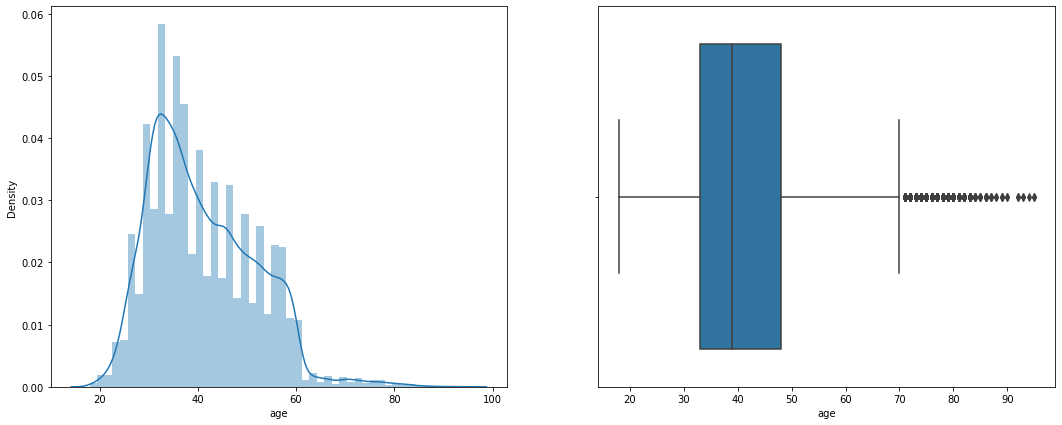

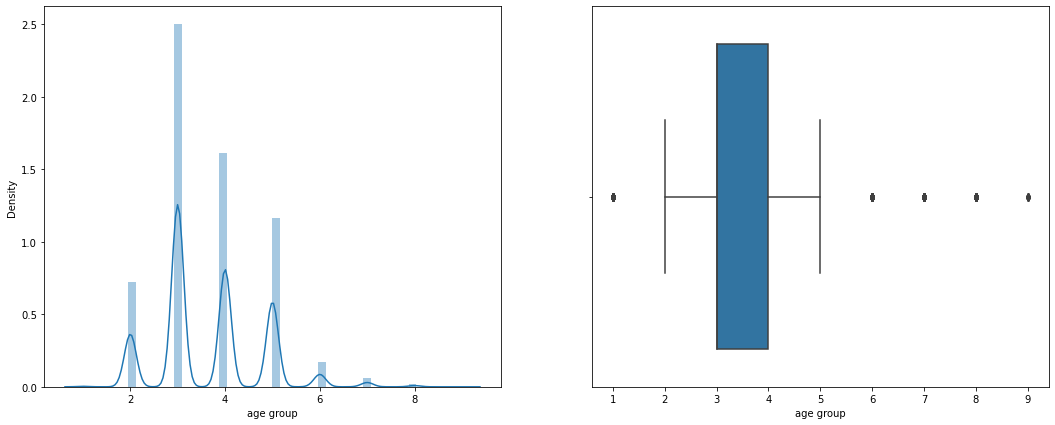

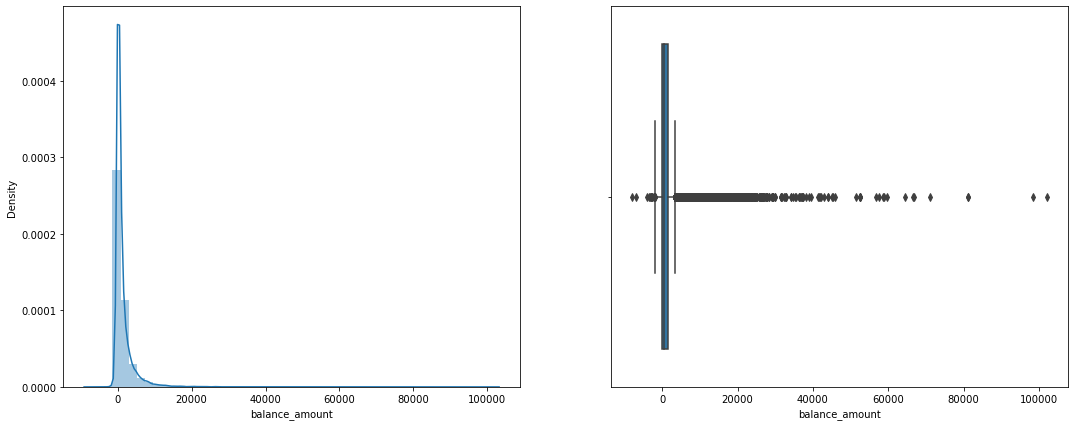

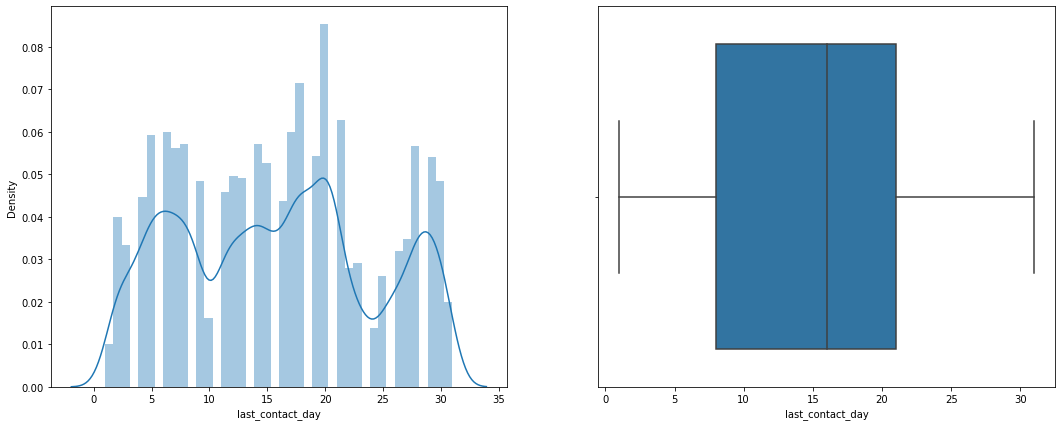

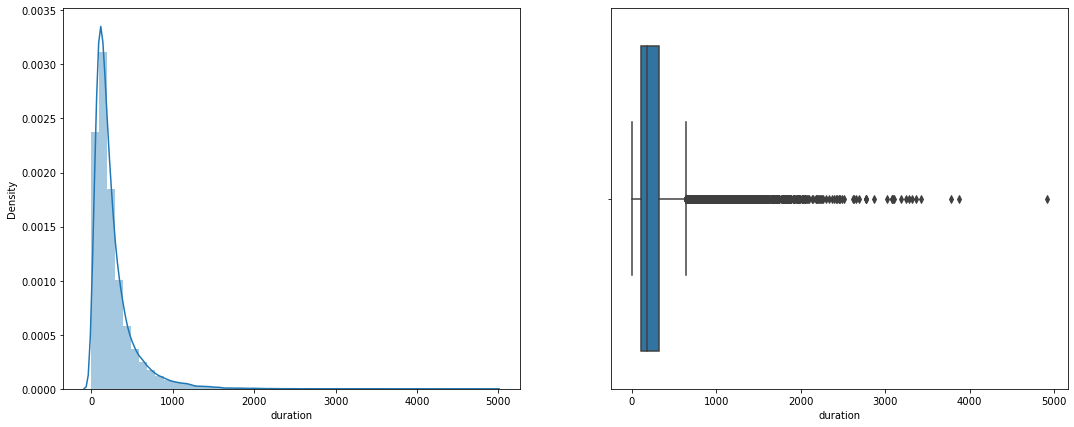

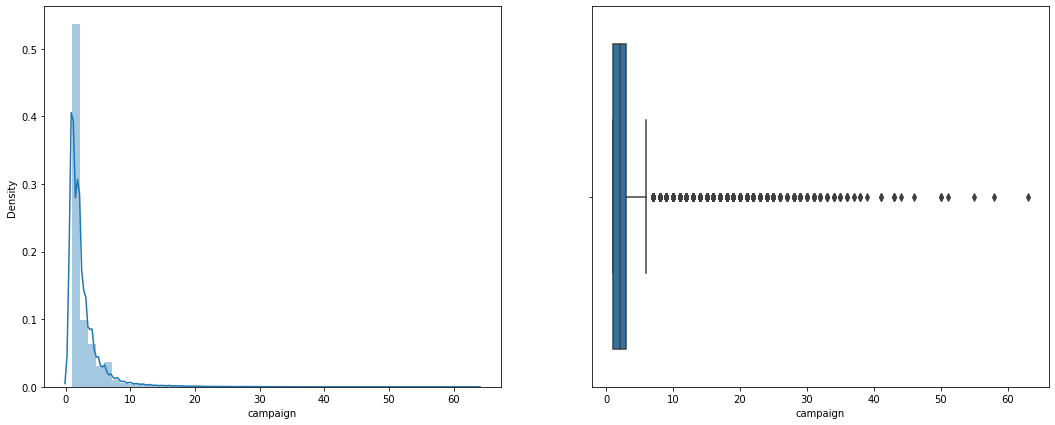

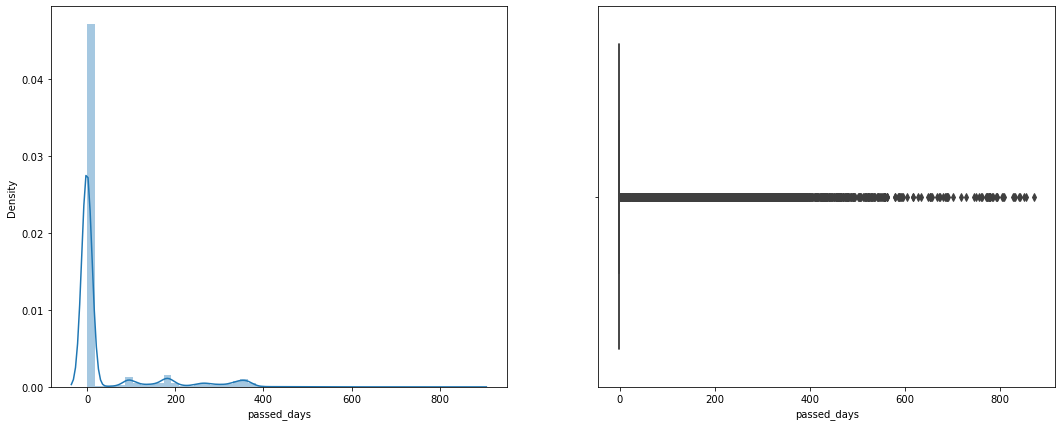

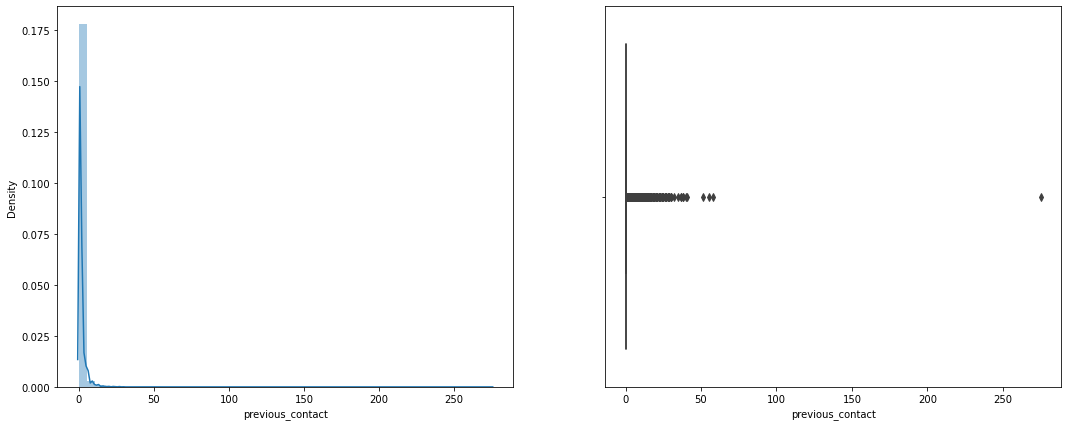

In [25]:
for i in num_col:
    plt.figure(figsize=(18,7))
    plt.subplot(1,2,1)
    sns.distplot(df[i])
    plt.subplot(1,2,2)
    sns.boxplot(df[i])
    plt.show()

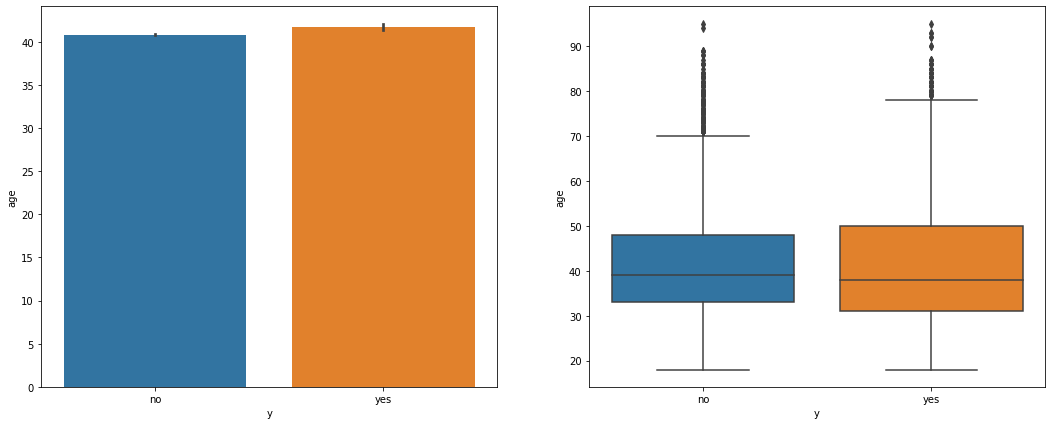

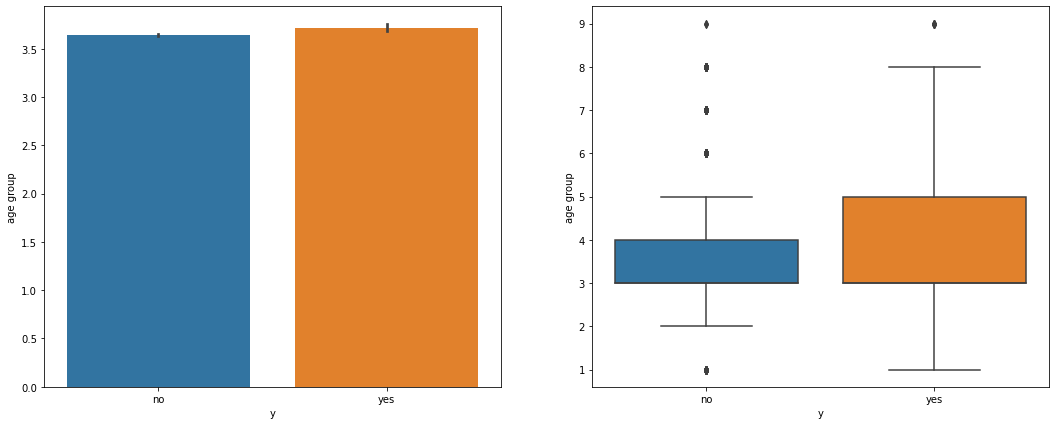

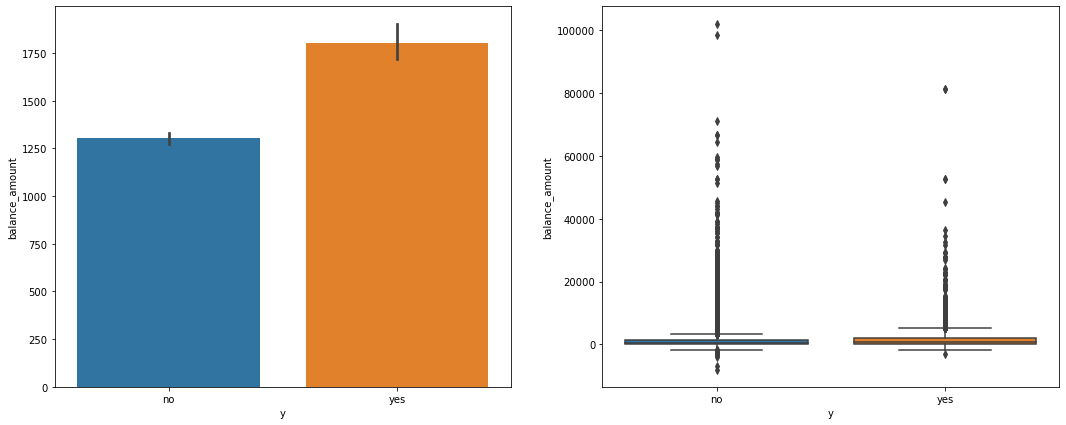

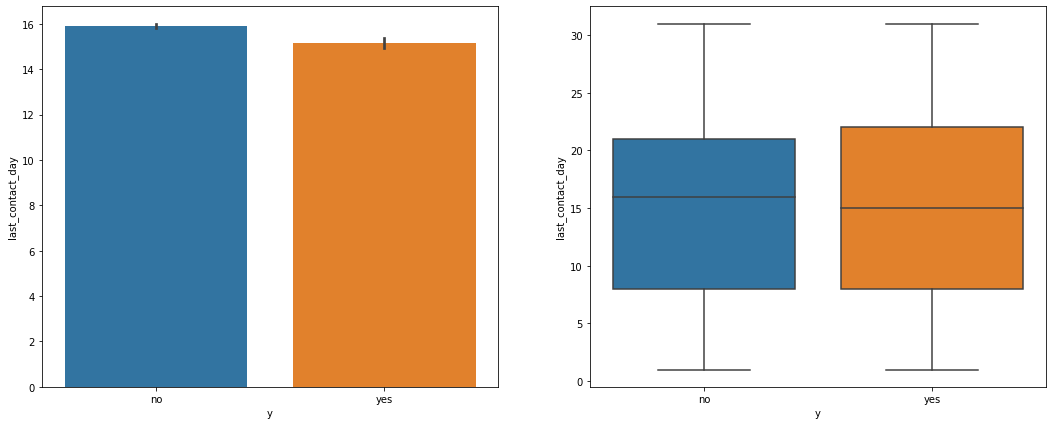

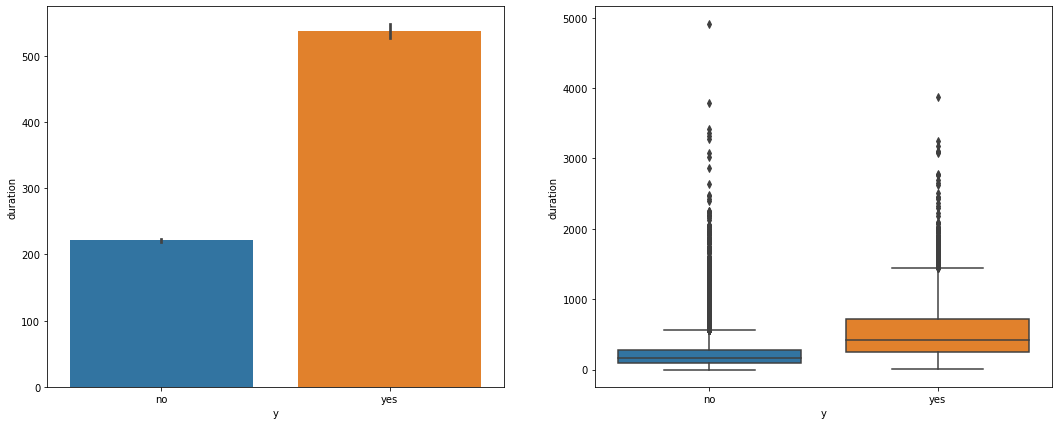

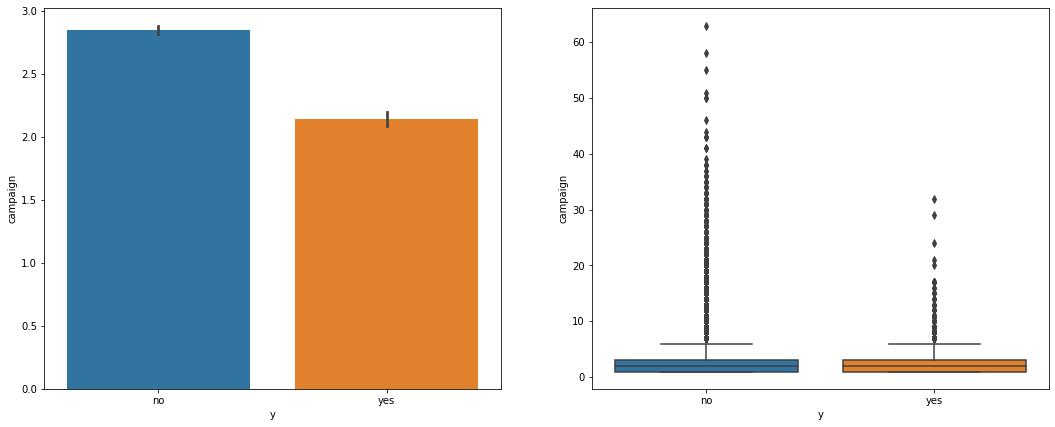

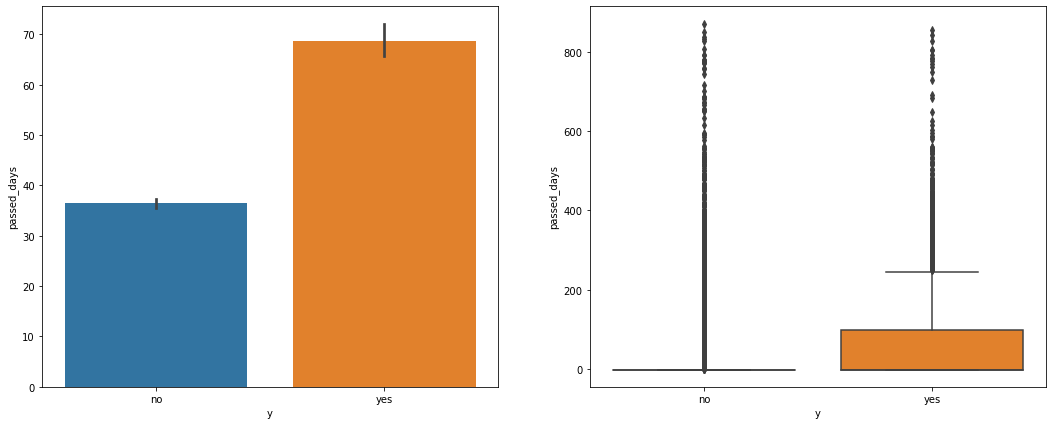

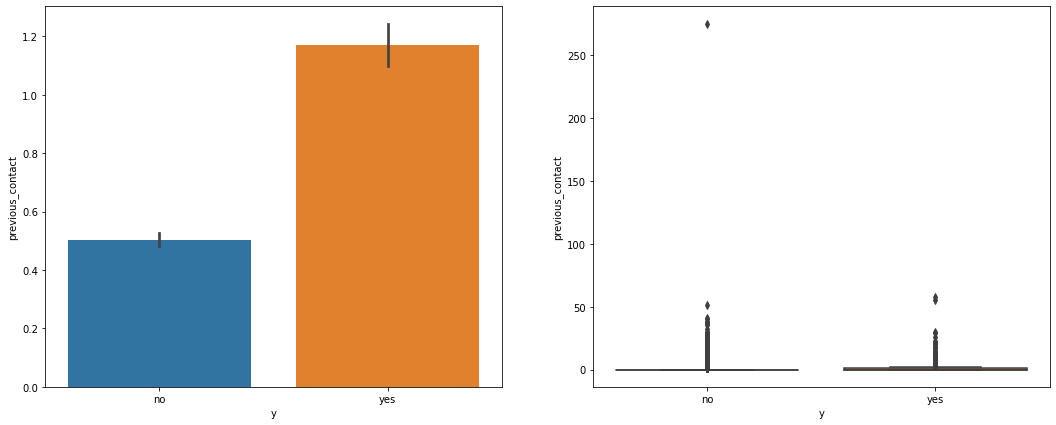

In [26]:
for i in num_col:
    plt.figure(figsize=(18,7))
    plt.subplot(1,2,1)
    sns.barplot(df['y'],df[i])
    plt.subplot(1,2,2)
    sns.boxplot(df['y'],df[i])
    plt.show()

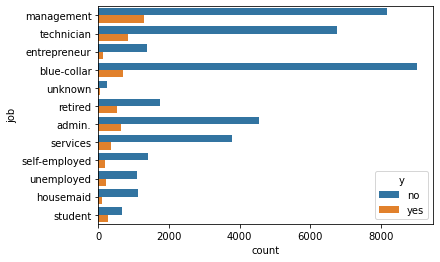

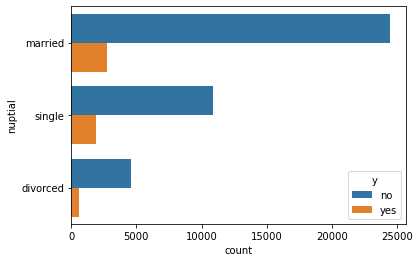

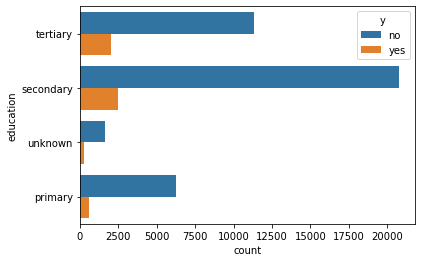

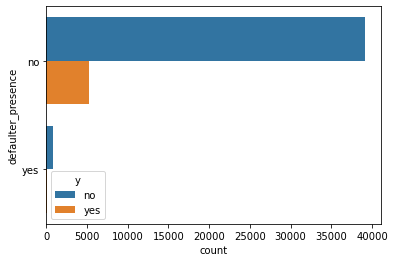

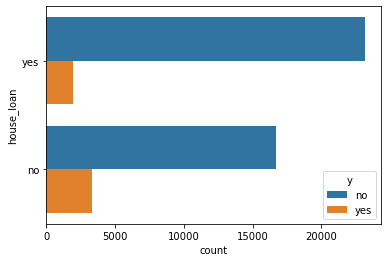

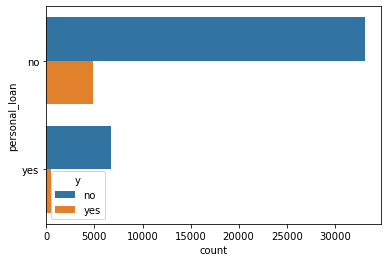

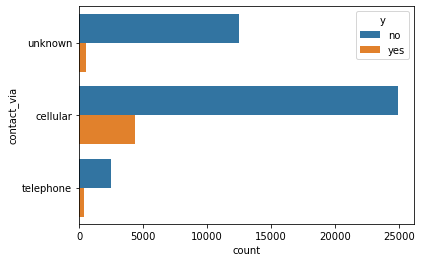

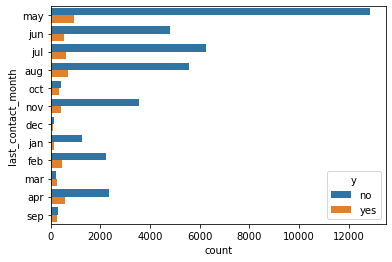

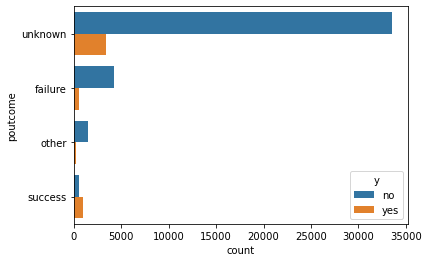

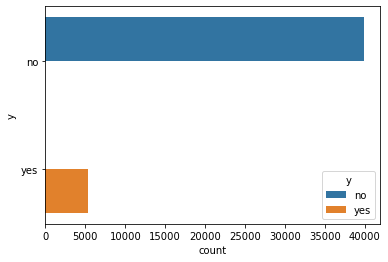

In [27]:
for i in cat_col:
    sns.countplot(y=df[i],hue=df['y'])
    plt.show()

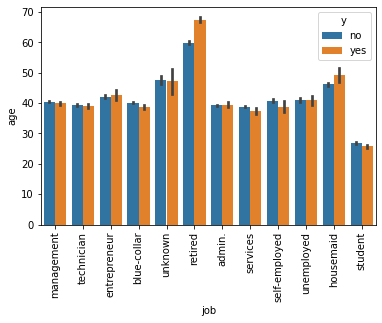

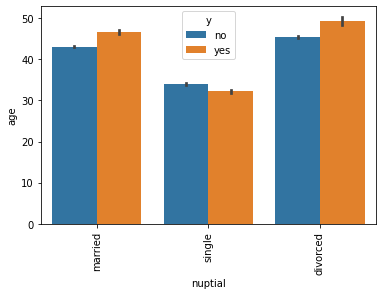

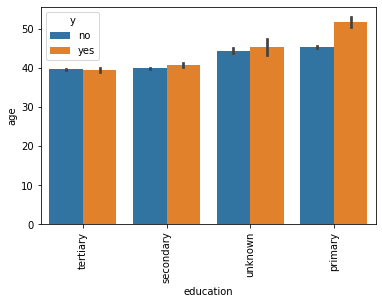

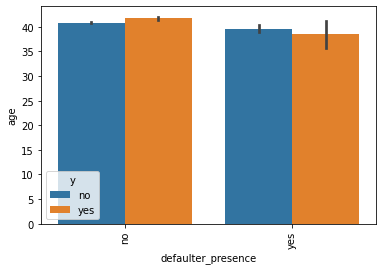

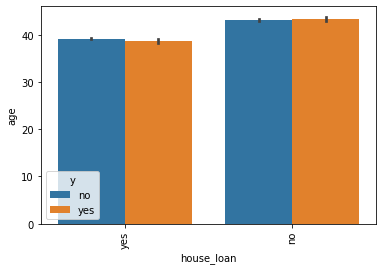

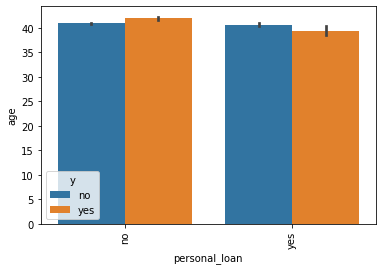

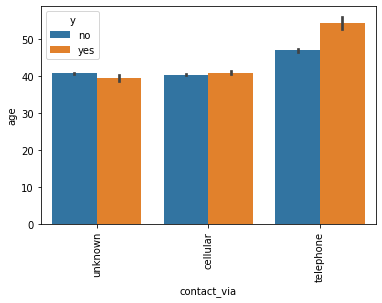

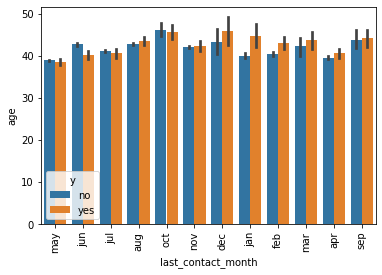

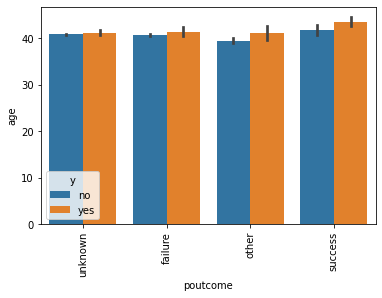

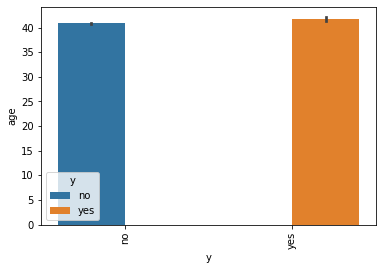

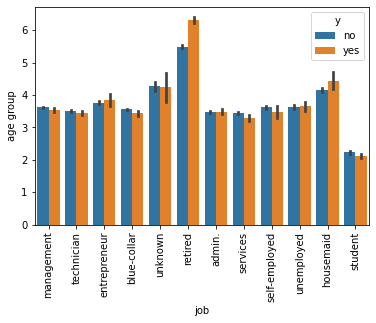

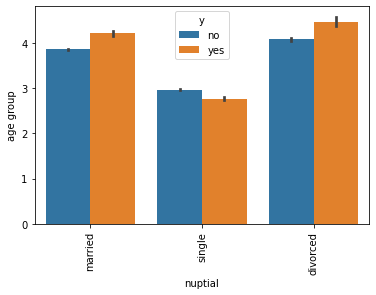

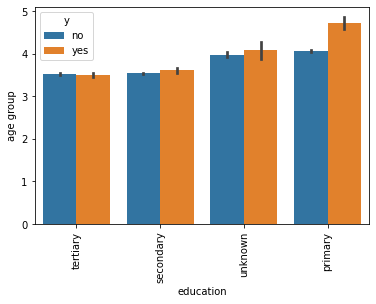

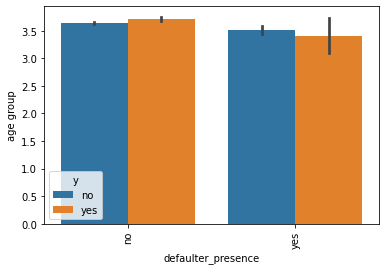

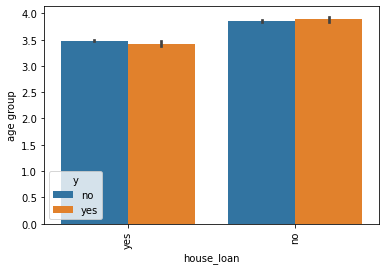

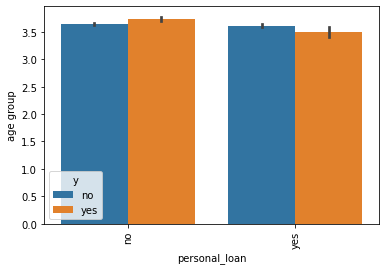

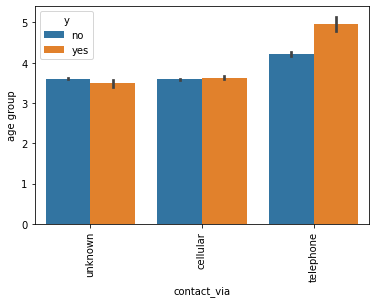

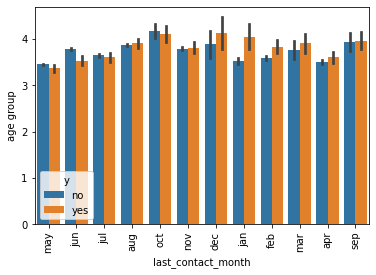

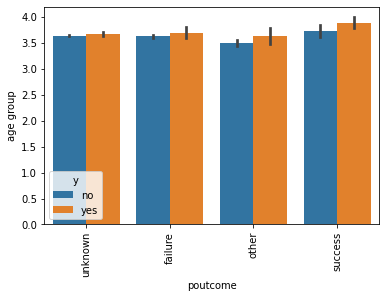

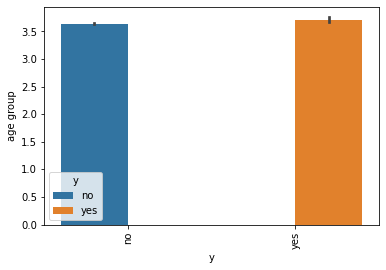

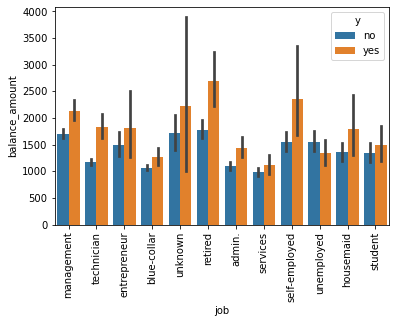

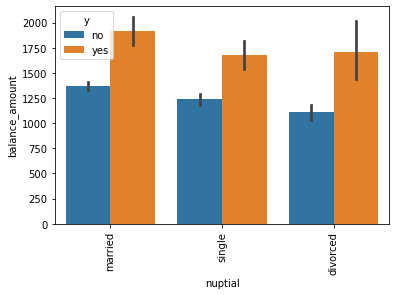

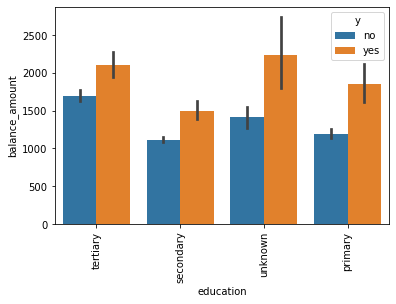

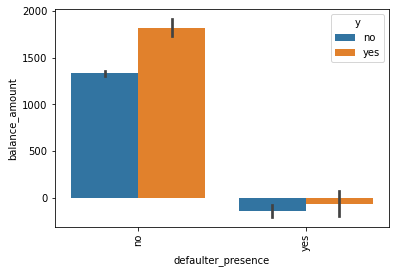

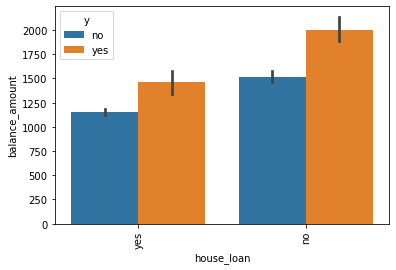

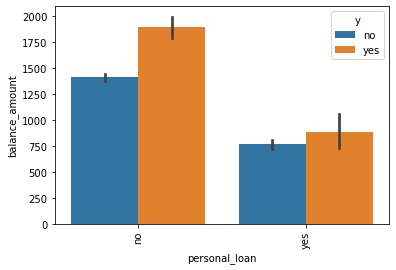

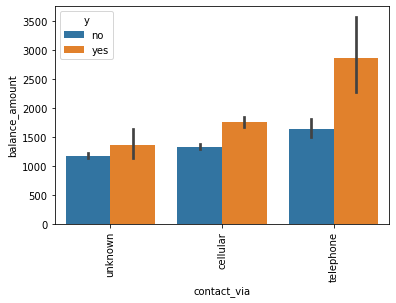

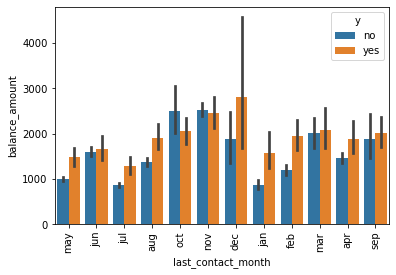

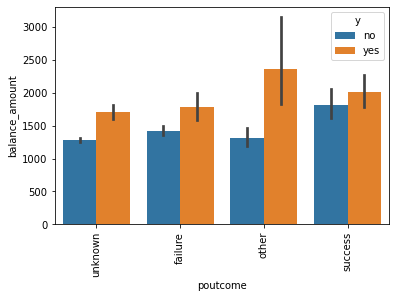

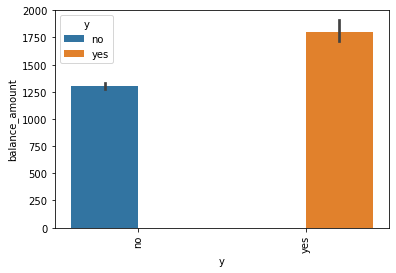

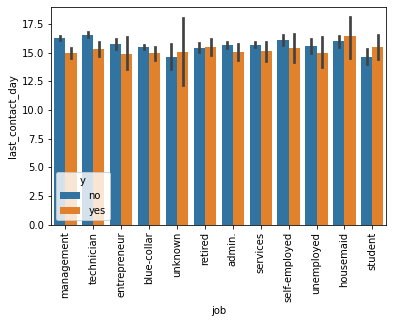

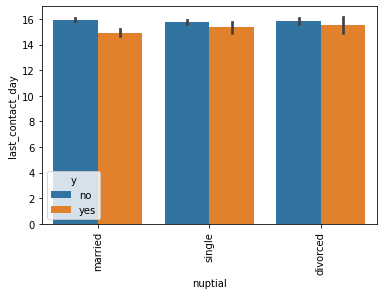

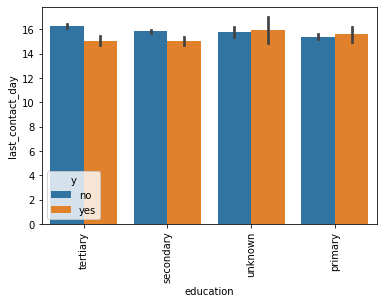

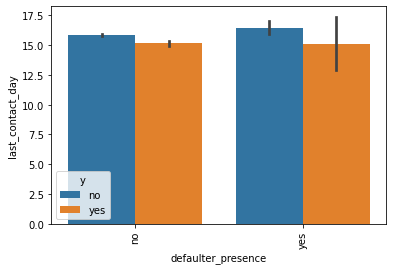

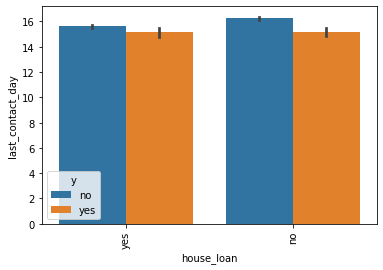

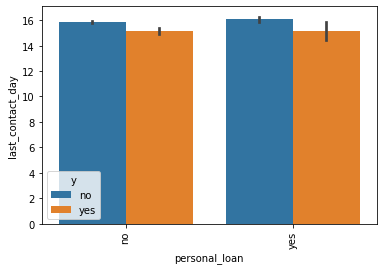

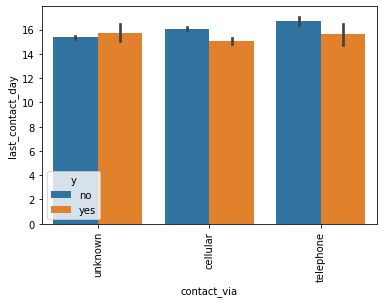

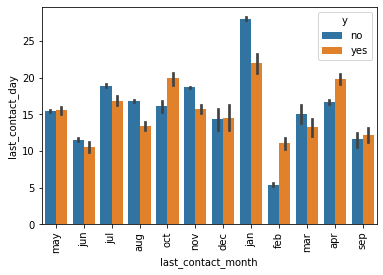

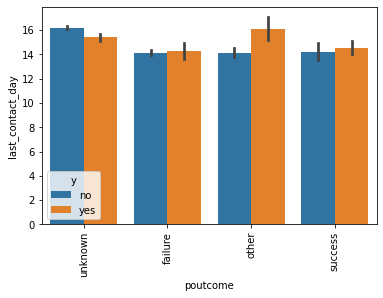

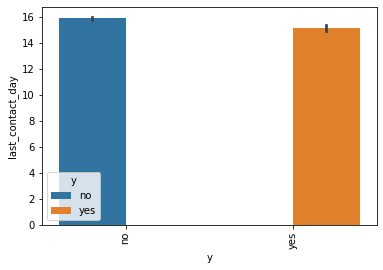

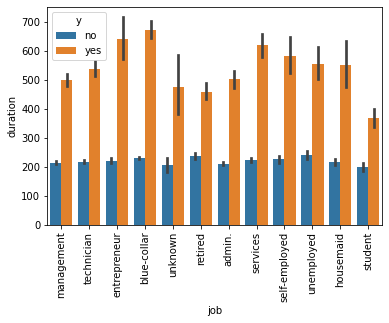

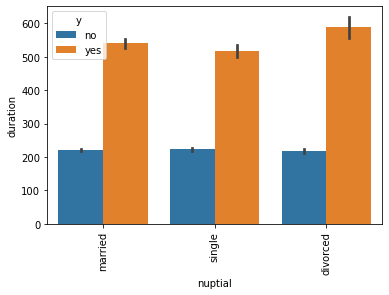

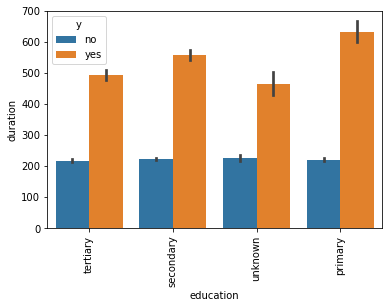

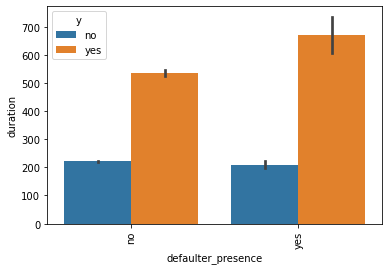

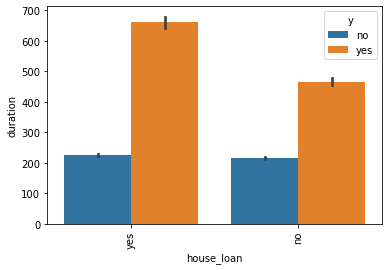

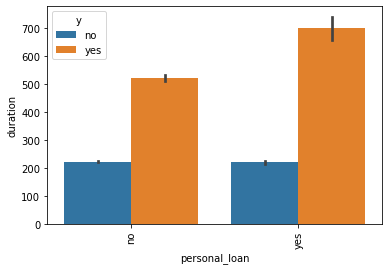

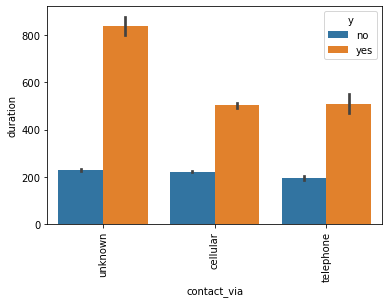

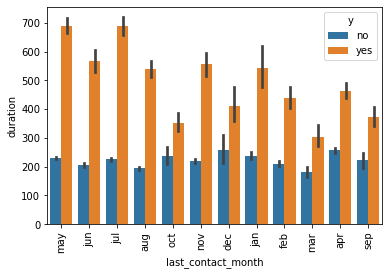

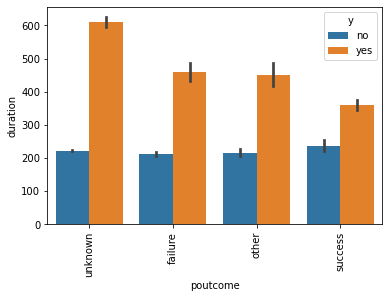

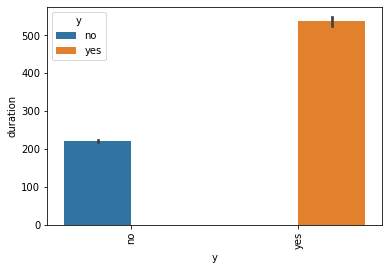

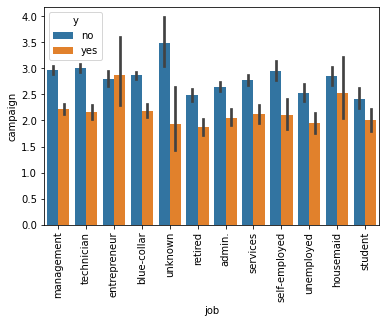

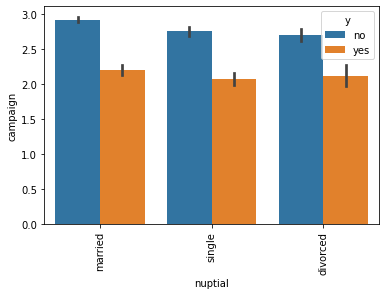

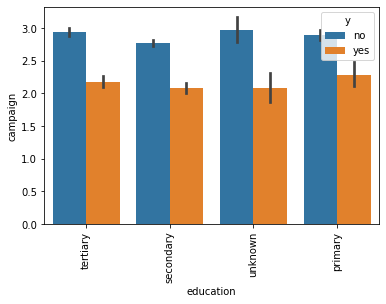

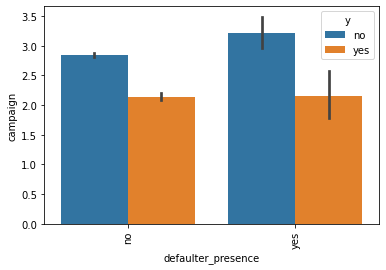

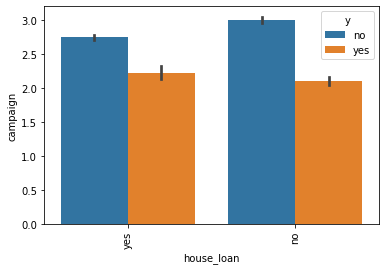

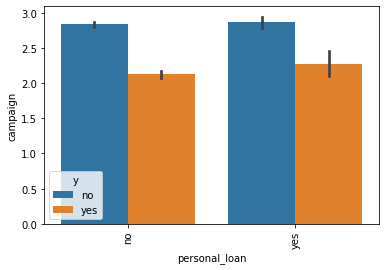

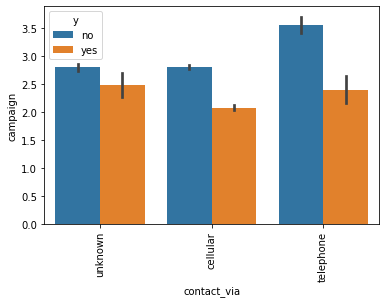

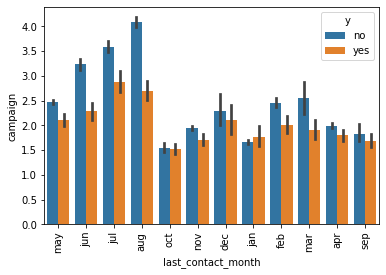

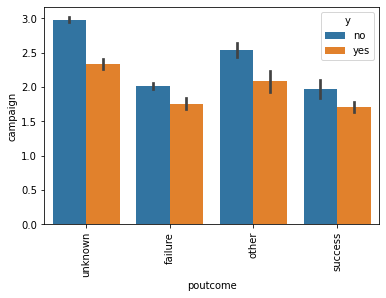

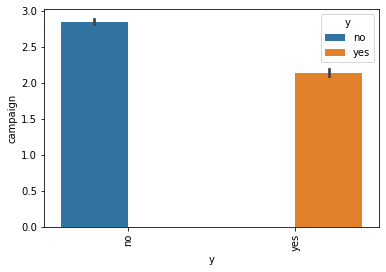

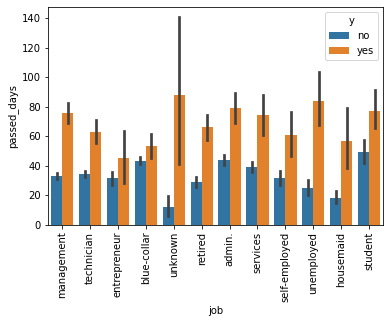

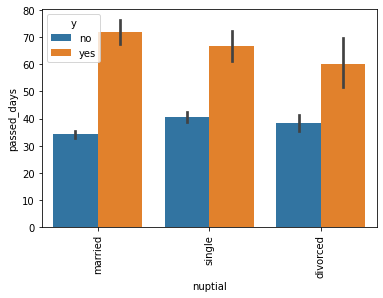

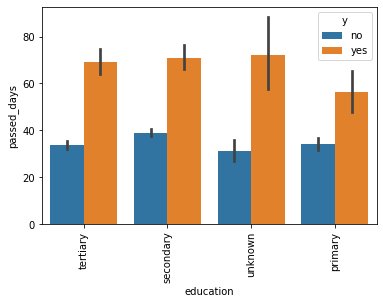

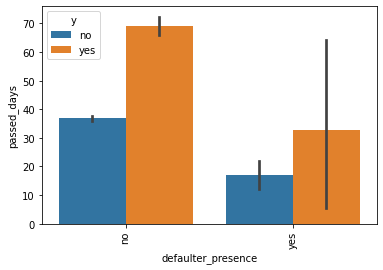

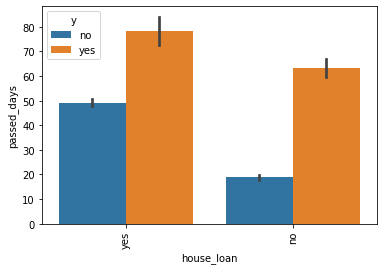

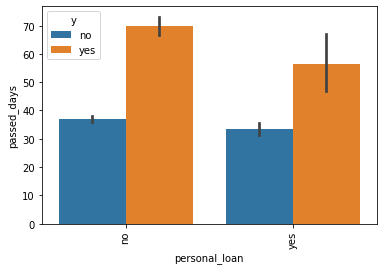

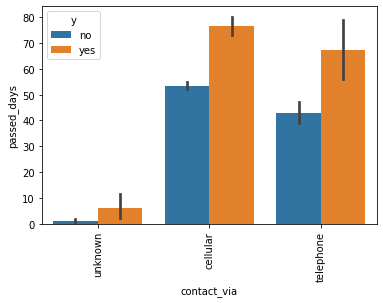

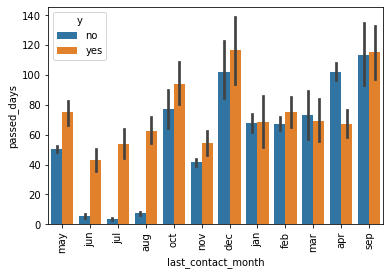

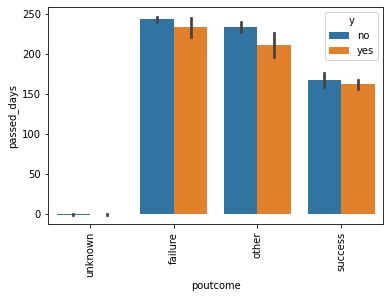

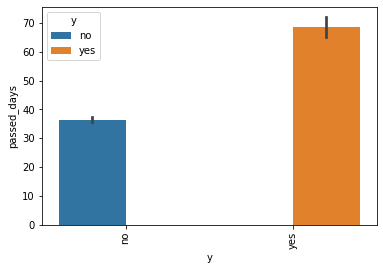

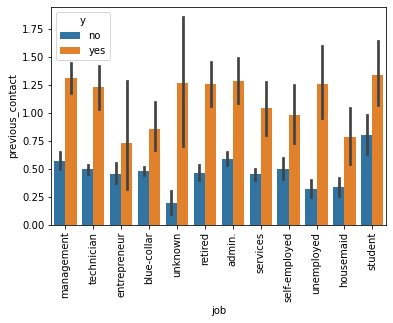

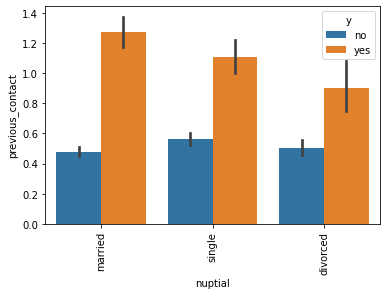

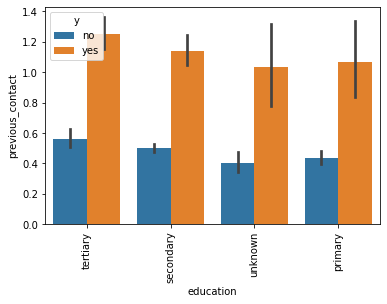

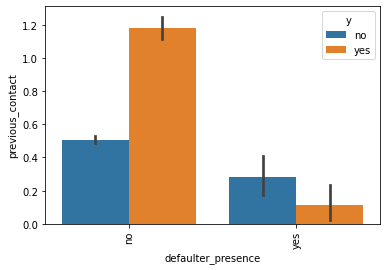

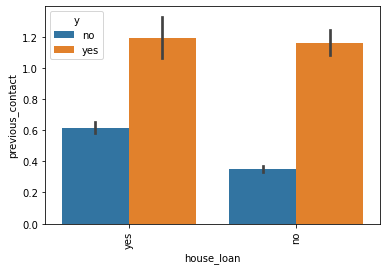

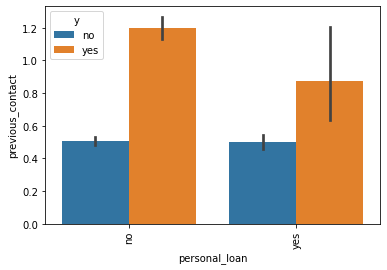

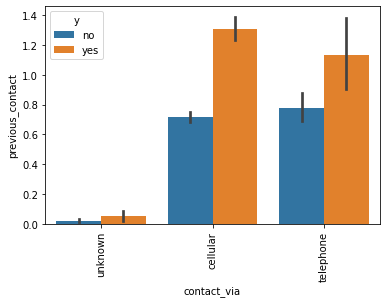

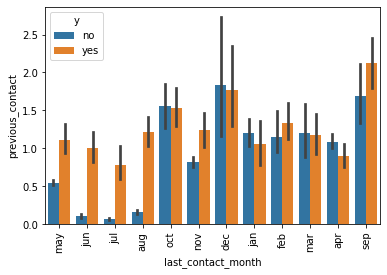

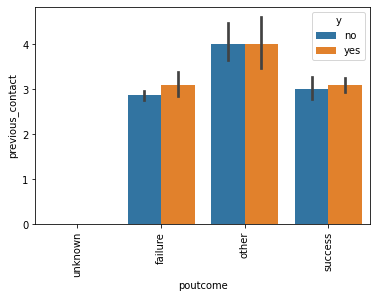

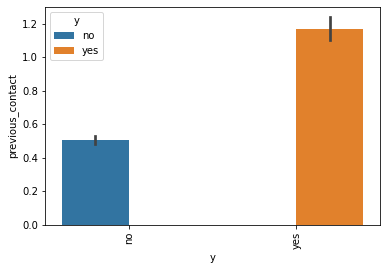

In [28]:
for i in num_col:
    for j in cat_col:
        sns.barplot(df[j],df[i],hue=df['y'])
        plt.xticks(rotation=90)
        plt.show()

In [29]:
df['y'].replace({'no':0,'yes':1},inplace=True)

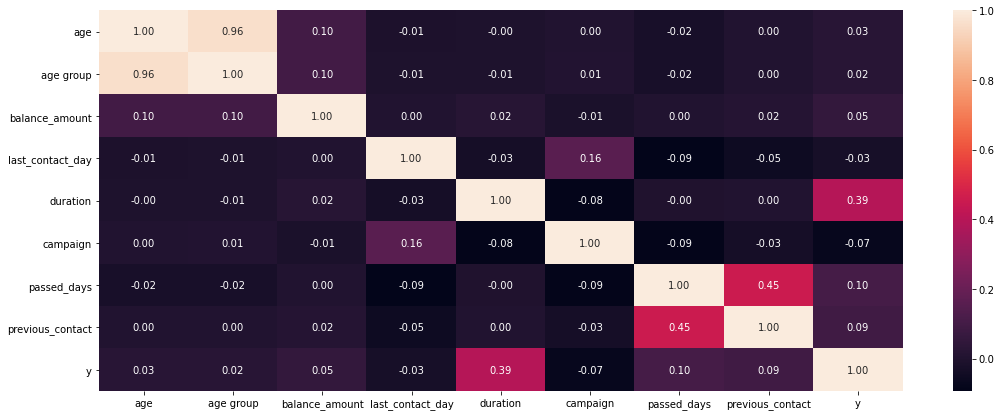

In [30]:
plt.figure(figsize=(18,7))
sns.heatmap(df.corr(),annot=True,fmt='.2f');

### Multi Collinearity Check:

In [31]:
num_col

['age',
 'age group',
 'balance_amount',
 'last_contact_day',
 'duration',
 'campaign',
 'passed_days',
 'previous_contact']

In [32]:
v = df[num_col]
vif = [VIF(v.values,i) for i in range(v.shape[1])]
vif_df = pd.DataFrame()
vif_df['numeric_features'] = v.columns
vif_df['VIF'] = vif
vif_df.sort_values('VIF',ascending=False)

,numeric_features,VIF
0,age,172.764911
1,age group,160.892434
3,last_contact_day,4.032780
4,duration,1.912673
5,campaign,1.827405
6,passed_days,1.456057
7,previous_contact,1.341648
2,balance_amount,1.212917


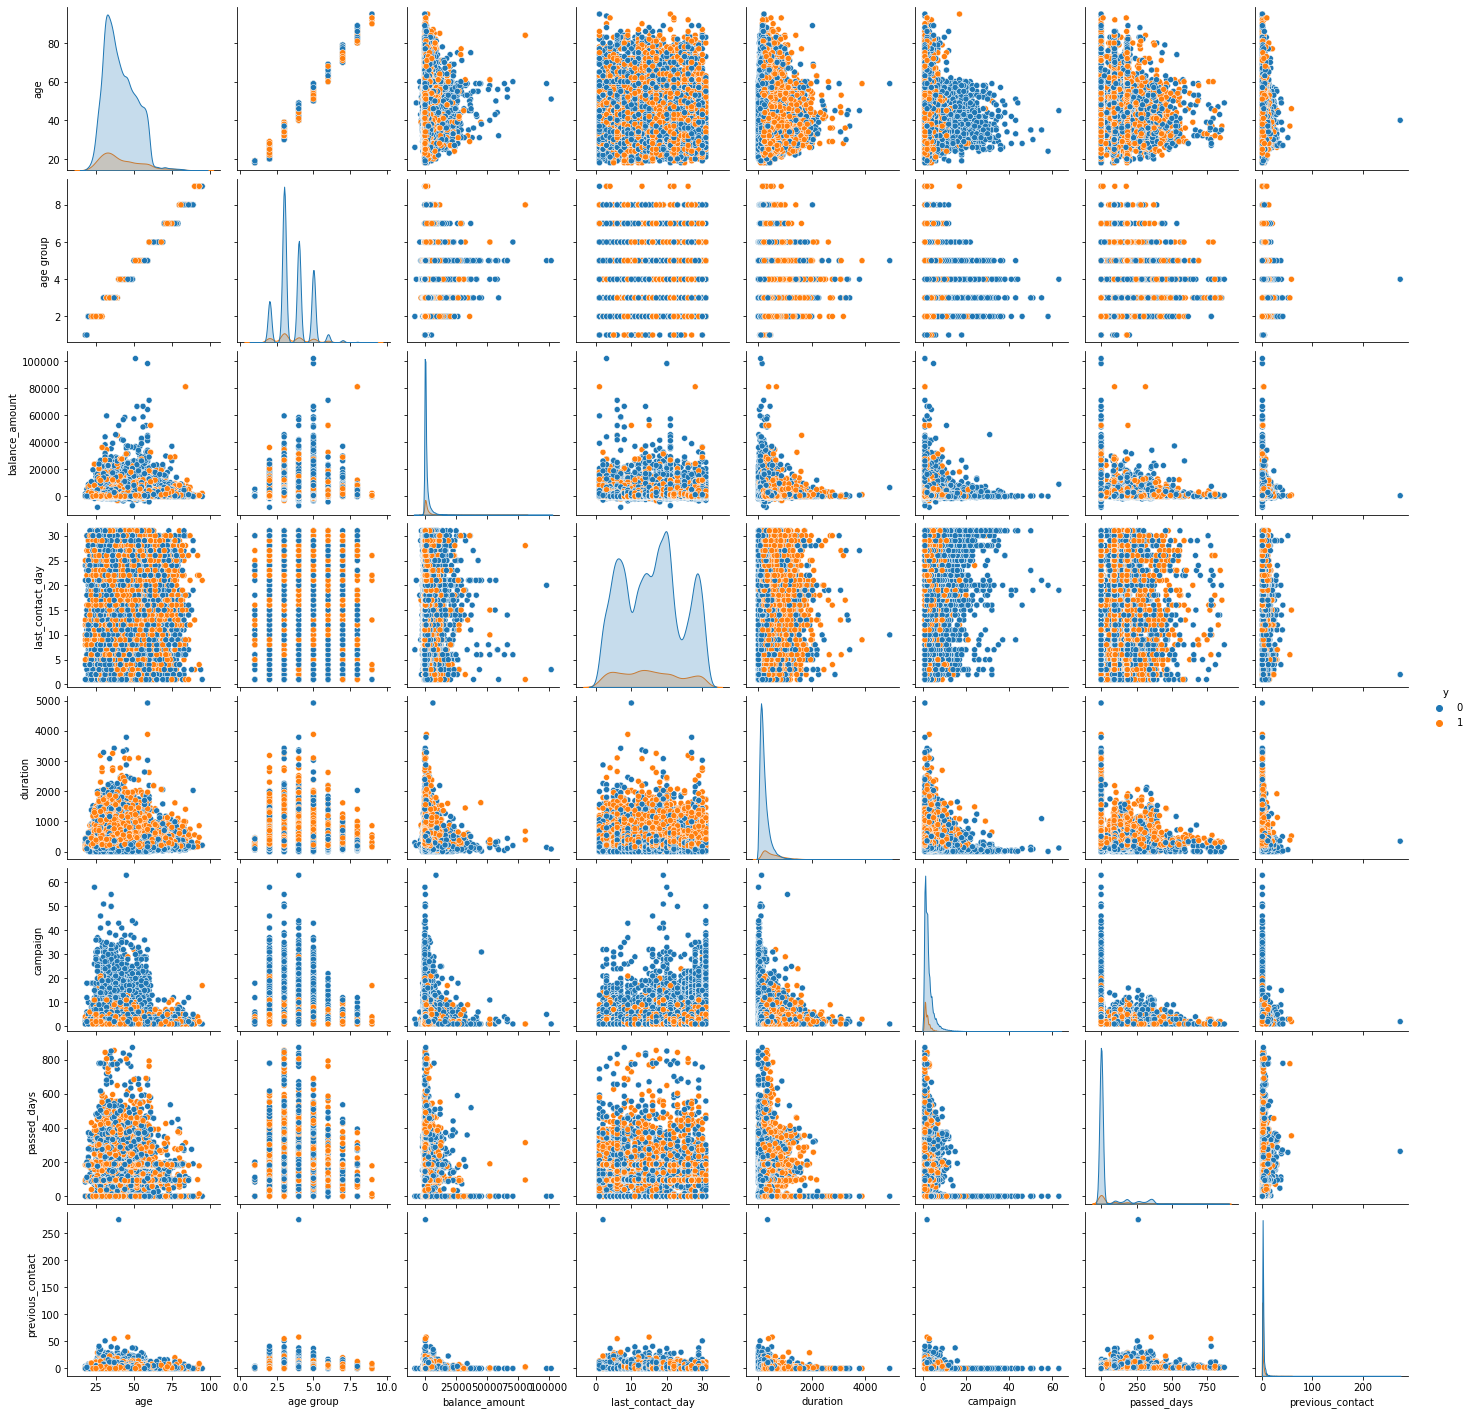

In [33]:
sns.pairplot(df,hue='y');

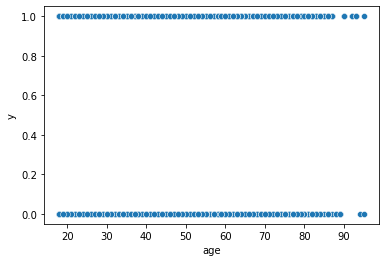

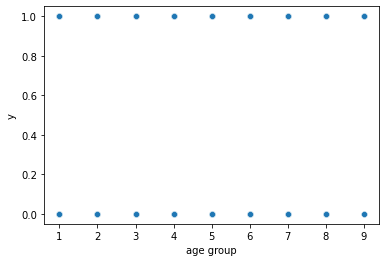

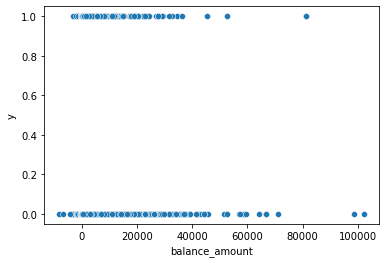

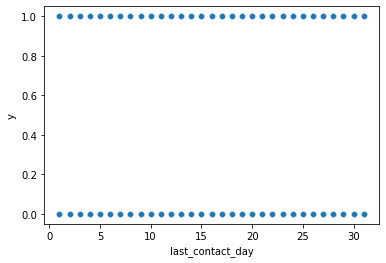

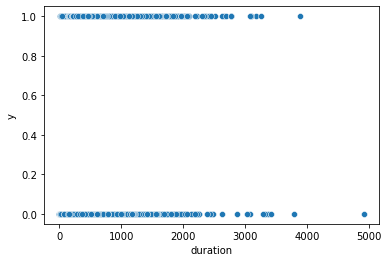

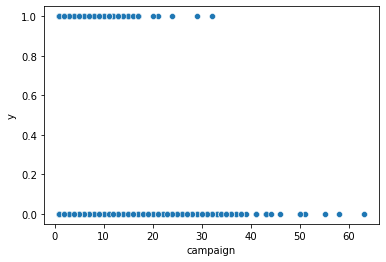

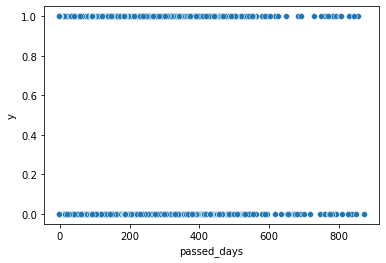

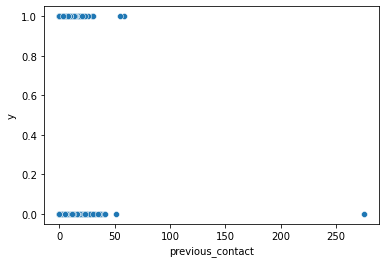

In [34]:
for i in num_col:
    sns.scatterplot(df[i],df['y'])
    plt.show()

# Treating 'Unknown' Values

In [35]:
pd.crosstab(df['job'],df['education'])

education,primary,secondary,tertiary,unknown
job,,,,
admin.,209,4219,572,171
blue-collar,3758,5371,149,454
entrepreneur,183,542,686,76
housemaid,627,395,173,45
management,294,1121,7801,242
retired,795,984,366,119
self-employed,130,577,833,39
services,345,3457,202,150
student,44,508,223,163


In [36]:
ind = df[(df['job']=='unknown') & (df['education']=='primary')]['job'].index
df.iloc[ind,2] = 'blue-collar'

In [37]:
ind = df[(df['job']=='unknown') & (df['education']=='secondary')]['job'].index
df.iloc[ind,2] = 'blue-collar'

In [38]:
ind = df[(df['job']=='unknown') & (df['education']=='tertiary')]['job'].index
df.iloc[ind,2] = 'management'

In [39]:
pd.crosstab(df['job'],df['education'])

education,primary,secondary,tertiary,unknown
job,,,,
admin.,209,4219,572,171
blue-collar,3809,5442,149,454
entrepreneur,183,542,686,76
housemaid,627,395,173,45
management,294,1121,7840,242
retired,795,984,366,119
self-employed,130,577,833,39
services,345,3457,202,150
student,44,508,223,163


In [40]:
ind = df[(df['education']=='unknown') & (df['job']=='admin.')]['education'].index
df.iloc[ind,4] = 'secondary'

In [41]:
ind = df[(df['education']=='unknown') & (df['job']=='blue-collar')]['education'].index
df.iloc[ind,4] = 'secondary'

In [42]:
ind = df[(df['education']=='unknown') & (df['job']=='entrepreneur')]['education'].index
df.iloc[ind,4] = 'tertiary'

In [43]:
ind = df[(df['education']=='unknown') & (df['job']=='housemaid')]['education'].index
df.iloc[ind,4] = 'primary'

In [44]:
ind = df[(df['education']=='unknown') & (df['job']=='management')]['education'].index
df.iloc[ind,4] = 'tertiary'

In [45]:
ind = df[(df['education']=='unknown') & (df['job']=='retired')]['education'].index
df.iloc[ind,4] = 'secondary'

In [46]:
ind = df[(df['education']=='unknown') & (df['job']=='self-employed')]['education'].index
df.iloc[ind,4] = 'tertiary'

In [47]:
ind = df[(df['education']=='unknown') & (df['job']=='services')]['education'].index
df.iloc[ind,4] = 'secondary'

In [48]:
ind = df[(df['education']=='unknown') & (df['job']=='student')]['education'].index
df.iloc[ind,4] = 'secondary'

In [49]:
ind = df[(df['education']=='unknown') & (df['job']=='technician')]['education'].index
df.iloc[ind,4] = 'secondary'

In [50]:
ind = df[(df['education']=='unknown') & (df['job']=='unemployed')]['education'].index
df.iloc[ind,4] = 'secondary'

In [51]:
pd.crosstab(df['job'],df['education'])

education,primary,secondary,tertiary,unknown
job,,,,
admin.,209,4390,572,0
blue-collar,3809,5896,149,0
entrepreneur,183,542,762,0
housemaid,672,395,173,0
management,294,1121,8082,0
retired,795,1103,366,0
self-employed,130,577,872,0
services,345,3607,202,0
student,44,671,223,0


In [52]:
ind = df[(df['education']=='unknown') & (df['job']=='unknown')].index
df.drop(index=ind,inplace=True)

In [53]:
pd.crosstab(df['job'],df['education'])

education,primary,secondary,tertiary
job,,,
admin.,209,4390,572
blue-collar,3809,5896,149
entrepreneur,183,542,762
housemaid,672,395,173
management,294,1121,8082
retired,795,1103,366
self-employed,130,577,872
services,345,3607,202
student,44,671,223


In [54]:
df['contact_via'].value_counts()

cellular     29236
unknown      12966
telephone     2882
Name: contact_via, dtype: int64

In [55]:
df['contact_via'].mode()[0]

'cellular'

In [56]:
df['contact_via'].replace({'unknown':df['contact_via'].mode()[0]},inplace=True)

In [57]:
df['poutcome'].value_counts()

unknown    36843
failure     4896
other       1839
success     1506
Name: poutcome, dtype: int64

In [58]:
df.drop('poutcome',1,inplace=True)

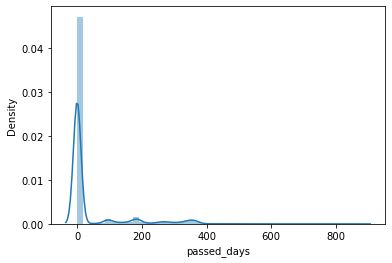

In [59]:
sns.distplot(df['passed_days']);

In [60]:
df['passed_days'].value_counts()

-1      36838
 182      166
 92       146
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: passed_days, Length: 558, dtype: int64

In [61]:
def pdays(x):
    if (x<=0):
        return 'Not.Previously.Contacted'
    elif (x>0 and x<=150):
        return '1-150 days'
    elif (x>150 and x<=300):
        return '151-300 days'
    else:
        return '>300 days'

In [62]:
df['passed_days'] = df['passed_days'].apply(pdays)

### Outliers Treatment

In [63]:
df.head()

,age,age group,job,nuptial,education,defaulter_presence,balance_amount,house_loan,personal_loan,contact_via,last_contact_day,last_contact_month,duration,campaign,passed_days,previous_contact,y
0,58,5,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,Not.Previously.Contacted,0,0
1,44,4,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,Not.Previously.Contacted,0,0
2,33,3,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,Not.Previously.Contacted,0,0
3,47,4,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,Not.Previously.Contacted,0,0
5,35,3,management,married,tertiary,no,231,yes,no,cellular,5,may,139,1,Not.Previously.Contacted,0,0


In [64]:
df.shape

(45084, 17)

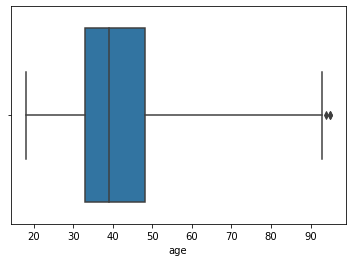

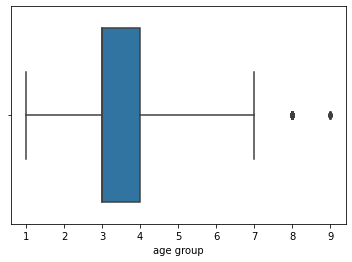

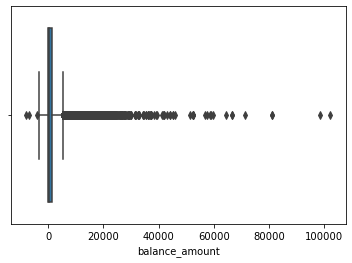

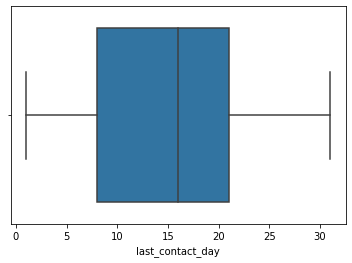

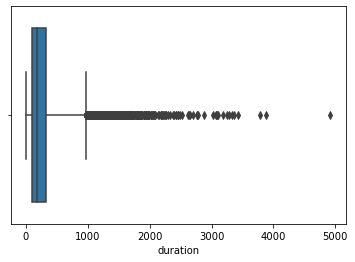

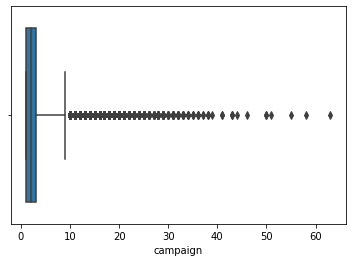

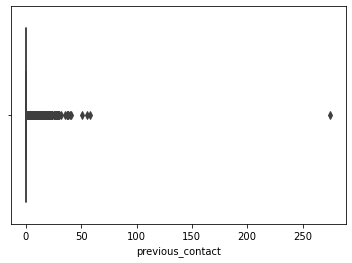

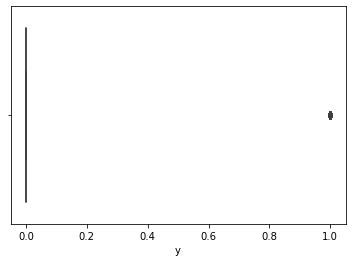

In [65]:
for i in df.select_dtypes(include=np.number).columns:
    sns.boxplot(df[i],whis=3)
    plt.show()

In [66]:
df['previous_contact'].value_counts()

0      36838
1       2767
2       2103
3       1141
4        713
5        459
6        276
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous_contact, dtype: int64

In [67]:
ind = df[df['previous_contact']>8].index
df.drop(index=ind,inplace=True)

In [68]:
df['previous_contact'].value_counts()

0    36838
1     2767
2     2103
3     1141
4      713
5      459
6      276
7      205
8      129
Name: previous_contact, dtype: int64

In [69]:
df.columns

Index(['age', 'age group', 'job', 'nuptial', 'education', 'defaulter_presence',
       'balance_amount', 'house_loan', 'personal_loan', 'contact_via',
       'last_contact_day', 'last_contact_month', 'duration', 'campaign',
       'passed_days', 'previous_contact', 'y'],
      dtype='object')

In [70]:
num_out = ['balance_amount','duration','campaign']

In [71]:
for i in num_out:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    ll = q1 - (3*iqr)
    ul = q3 + (3*iqr)
    df[i] = df[(df[i]>=ll) & (df[i]<=ul)][i]

In [72]:
df.isnull().sum()/len(df)*100

age                   0.000000
age group             0.000000
job                   0.000000
nuptial               0.000000
education             0.000000
defaulter_presence    0.000000
balance_amount        5.444646
house_loan            0.000000
personal_loan         0.000000
contact_via           0.000000
last_contact_day      0.000000
last_contact_month    0.000000
duration              2.567722
campaign              3.246622
passed_days           0.000000
previous_contact      0.000000
y                     0.000000
dtype: float64

In [73]:
df.dropna(inplace=True)

In [74]:
df.shape

(39771, 17)

### Statistical Tests

In [75]:
df.head()

,age,age group,job,nuptial,education,defaulter_presence,balance_amount,house_loan,personal_loan,contact_via,last_contact_day,last_contact_month,duration,campaign,passed_days,previous_contact,y
0,58,5,management,married,tertiary,no,2143.0,yes,no,cellular,5,may,261.0,1.0,Not.Previously.Contacted,0,0
1,44,4,technician,single,secondary,no,29.0,yes,no,cellular,5,may,151.0,1.0,Not.Previously.Contacted,0,0
2,33,3,entrepreneur,married,secondary,no,2.0,yes,yes,cellular,5,may,76.0,1.0,Not.Previously.Contacted,0,0
3,47,4,blue-collar,married,secondary,no,1506.0,yes,no,cellular,5,may,92.0,1.0,Not.Previously.Contacted,0,0
5,35,3,management,married,tertiary,no,231.0,yes,no,cellular,5,may,139.0,1.0,Not.Previously.Contacted,0,0


In [76]:
df.columns

Index(['age', 'age group', 'job', 'nuptial', 'education', 'defaulter_presence',
       'balance_amount', 'house_loan', 'personal_loan', 'contact_via',
       'last_contact_day', 'last_contact_month', 'duration', 'campaign',
       'passed_days', 'previous_contact', 'y'],
      dtype='object')

In [77]:
num_col = df.select_dtypes(include=np.number)

In [78]:
cat_col = df.select_dtypes(include=object)

In [79]:
print(list(num_col))

['age', 'age group', 'balance_amount', 'last_contact_day', 'duration', 'campaign', 'previous_contact', 'y']


In [80]:
print(list(cat_col))

['job', 'nuptial', 'education', 'defaulter_presence', 'house_loan', 'personal_loan', 'contact_via', 'last_contact_month', 'passed_days']


In [81]:
num_col = ['age', 'balance_amount', 'last_contact_day', 'duration', 'campaign', 'previous_contact', 'y']

In [82]:
cat_col = ['job', 'nuptial', 'education', 'defaulter_presence', 'house_loan', 'personal_loan', 'contact_via', 
           'last_contact_month', 'passed_days']

In [83]:
# Chi-sqr Test of Independence
# Hypothesis Formation
# Ho : Variables are Independant (NO relation)
# Ha : Variables are Not independant (Relation)

def chi(obs):
    chi_stat,pval,df,exp_tab = stats.chi2_contingency(obs)
    return pval

not_sig_features = []
sig_features = []

for i in cat_col:
    obs = pd.crosstab(df[i],df['y'])
    pval = chi(obs)
    if (pval > 0.05):
        not_sig_features.append(i)   # Accept H0
    else:
        sig_features.append(i)       # Reject Ho

In [84]:
not_sig_features

[]

In [85]:
sig_features

['job',
 'nuptial',
 'education',
 'defaulter_presence',
 'house_loan',
 'personal_loan',
 'contact_via',
 'last_contact_month',
 'passed_days']

In [86]:
for i in num_col:
    stat,pval = stats.shapiro(df[i])
    print(i,':',pval)

age : 0.0
balance_amount : 0.0
last_contact_day : 0.0
duration : 0.0
campaign : 0.0
previous_contact : 0.0
y : 0.0


### Encoding

In [87]:
df.head()

,age,age group,job,nuptial,education,defaulter_presence,balance_amount,house_loan,personal_loan,contact_via,last_contact_day,last_contact_month,duration,campaign,passed_days,previous_contact,y
0,58,5,management,married,tertiary,no,2143.0,yes,no,cellular,5,may,261.0,1.0,Not.Previously.Contacted,0,0
1,44,4,technician,single,secondary,no,29.0,yes,no,cellular,5,may,151.0,1.0,Not.Previously.Contacted,0,0
2,33,3,entrepreneur,married,secondary,no,2.0,yes,yes,cellular,5,may,76.0,1.0,Not.Previously.Contacted,0,0
3,47,4,blue-collar,married,secondary,no,1506.0,yes,no,cellular,5,may,92.0,1.0,Not.Previously.Contacted,0,0
5,35,3,management,married,tertiary,no,231.0,yes,no,cellular,5,may,139.0,1.0,Not.Previously.Contacted,0,0


In [88]:
df['last_contact_month'].replace({'may':5,'jun':6,'jul':7,'aug':8,'oct':10,'nov':11,'dec':12,'jan':1,'feb':2,'mar':3,
                     'apr':4,'sep':9},inplace=True)

In [89]:
cat_le = ['job','nuptial','education','defaulter_presence','house_loan',
          'personal_loan','contact_via','passed_days']

In [90]:
df[cat_le].head()

,job,nuptial,education,defaulter_presence,house_loan,personal_loan,contact_via,passed_days
0,management,married,tertiary,no,yes,no,cellular,Not.Previously.Contacted
1,technician,single,secondary,no,yes,no,cellular,Not.Previously.Contacted
2,entrepreneur,married,secondary,no,yes,yes,cellular,Not.Previously.Contacted
3,blue-collar,married,secondary,no,yes,no,cellular,Not.Previously.Contacted
5,management,married,tertiary,no,yes,no,cellular,Not.Previously.Contacted


In [91]:
for i in cat_le:
    print(i,'',df[i].unique())
    print()

job  ['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']

nuptial  ['married' 'single' 'divorced']

education  ['tertiary' 'secondary' 'primary']

defaulter_presence  ['no' 'yes']

house_loan  ['yes' 'no']

personal_loan  ['no' 'yes']

contact_via  ['cellular' 'telephone']

passed_days  ['Not.Previously.Contacted' '151-300 days' '1-150 days' '>300 days']



In [92]:
le = LabelEncoder()

In [93]:
for i in cat_le:
    df[i] = le.fit_transform(df[i])

In [94]:
df.dtypes

age                     int64
age group               int64
job                     int32
nuptial                 int32
education               int32
defaulter_presence      int32
balance_amount        float64
house_loan              int32
personal_loan           int32
contact_via             int32
last_contact_day        int64
last_contact_month      int64
duration              float64
campaign              float64
passed_days             int32
previous_contact        int64
y                       int64
dtype: object

In [95]:
df.drop('age',1,inplace=True)

In [96]:
df.head()

,age group,job,nuptial,education,defaulter_presence,balance_amount,house_loan,personal_loan,contact_via,last_contact_day,last_contact_month,duration,campaign,passed_days,previous_contact,y
0,5,4,1,2,0,2143.0,1,0,0,5,5,261.0,1.0,3,0,0
1,4,9,2,1,0,29.0,1,0,0,5,5,151.0,1.0,3,0,0
2,3,2,1,1,0,2.0,1,1,0,5,5,76.0,1.0,3,0,0
3,4,1,1,1,0,1506.0,1,0,0,5,5,92.0,1.0,3,0,0
5,3,4,1,2,0,231.0,1,0,0,5,5,139.0,1.0,3,0,0


### Handling Imbalanced Data

In [97]:
df['y'].value_counts()

0    35650
1     4121
Name: y, dtype: int64

In [98]:
df['y'].value_counts(normalize=True)*100

0    89.638179
1    10.361821
Name: y, dtype: float64

In [99]:
x = df.drop('y',1)
y = df['y']

In [100]:
smote = SMOTE(sampling_strategy=0.5,random_state=10)
x_sm,y_sm = smote.fit_resample(x,y)

In [101]:
df_sm = pd.DataFrame(x_sm,columns=x.columns)
df_sm['y']=y_sm
df_sm.head()

,age group,job,nuptial,education,defaulter_presence,balance_amount,house_loan,personal_loan,contact_via,last_contact_day,last_contact_month,duration,campaign,passed_days,previous_contact,y
0,5,4,1,2,0,2143.0,1,0,0,5,5,261.0,1.0,3,0,0
1,4,9,2,1,0,29.0,1,0,0,5,5,151.0,1.0,3,0,0
2,3,2,1,1,0,2.0,1,1,0,5,5,76.0,1.0,3,0,0
3,4,1,1,1,0,1506.0,1,0,0,5,5,92.0,1.0,3,0,0
4,3,4,1,2,0,231.0,1,0,0,5,5,139.0,1.0,3,0,0


In [102]:
df_sm['y'].value_counts()

0    35650
1    17825
Name: y, dtype: int64

In [103]:
df_sm['y'].value_counts(normalize=True)*100

0    66.666667
1    33.333333
Name: y, dtype: float64

In [104]:
df.to_csv('Capstone_df.csv')
df_sm.to_csv('Capstone_df_sm.csv')

In [105]:
df.head()

,age group,job,nuptial,education,defaulter_presence,balance_amount,house_loan,personal_loan,contact_via,last_contact_day,last_contact_month,duration,campaign,passed_days,previous_contact,y
0,5,4,1,2,0,2143.0,1,0,0,5,5,261.0,1.0,3,0,0
1,4,9,2,1,0,29.0,1,0,0,5,5,151.0,1.0,3,0,0
2,3,2,1,1,0,2.0,1,1,0,5,5,76.0,1.0,3,0,0
3,4,1,1,1,0,1506.0,1,0,0,5,5,92.0,1.0,3,0,0
5,3,4,1,2,0,231.0,1,0,0,5,5,139.0,1.0,3,0,0


In [106]:
df_sm.head()

,age group,job,nuptial,education,defaulter_presence,balance_amount,house_loan,personal_loan,contact_via,last_contact_day,last_contact_month,duration,campaign,passed_days,previous_contact,y
0,5,4,1,2,0,2143.0,1,0,0,5,5,261.0,1.0,3,0,0
1,4,9,2,1,0,29.0,1,0,0,5,5,151.0,1.0,3,0,0
2,3,2,1,1,0,2.0,1,1,0,5,5,76.0,1.0,3,0,0
3,4,1,1,1,0,1506.0,1,0,0,5,5,92.0,1.0,3,0,0
4,3,4,1,2,0,231.0,1,0,0,5,5,139.0,1.0,3,0,0


# Assumptions

# For Logistic Regression

## From GL Pdf
### Assumption 1
Independence of error, whereby all sample group outcomes are
separate from each other (i.e., there are no duplicate responses)
### Assumption 2
Linearity in the logit for any continuous independent variables
### Assumption 3
Absence of multicollinearity
### Assumption 4
lack of strongly influential outliers

## From Internet
### Assumption 1: Appropriate dependent variable structure
This assumption simply states that a binary logistic regression requires your dependent variable to be dichotomous and an ordinal logistic regression requires it to be ordinal.
In addition, the dependent variable should neither be an interval nor ratio scale.
### Assumption 2: There is a linear relationship between the logit of the outcome and each independent variable.
The logit function is given by:
logit(p) = log(p/(1-p)), where p is the probability of an outcome
To check this assumption, you can do it visually by plotting each independent variable and the logit values on a scatterplot.The Y axes are the independent variables while the X axis shows the logit values. Then look at the equation of the curve to see if it meets the linearity assumption.
Remember that linearity is in the parameters. As long as the equation meets the linear equation form stated above, it meets the linearity assumption.
### Assumption 3: No Multicollinearity
As with the assumption for OLS regression, the same can be said here.
### Assumption 4: No Influential Outliers
Influential outliers are extreme data points that affect the quality of the logistic regression model.
Not all outliers are influential.
You will need to check for which points are the influential ones before removing or transforming them for analysis.
To check for outliers, you can run Cook’s Distance on the data values. A high Cook’s Distance value indicates outliers.
A rule of thumb for flagging out an influential outlier is when Cook’s Distance > 1.
### Assumption 5: Observation Independence
This assumption requires logistic regression observations to be independent of each other.
That is, observations should not come from a repeated measure design.
A repeated measure design refers to multiple measures of the same variable taken for the same person under different experimental conditions or across time.
A good example of repeated measures is longitudinal studies — tracking progress of a subject over years.

# For KNN
### Assumptions in KNN
Before using KNN, let us revisit some of the assumptions in KNN.

KNN assumes that the data is in a feature space. More exactly, the data points are in a metric space. The data can be scalars or possibly even multidimensional vectors. Since the points are in feature space, they have a notion of distance – This need not necessarily be Euclidean distance although it is the one commonly used.

Each of the training data consists of a set of vectors and class label associated with each vector. In the simplest case , it will be either + or – (for positive or negative classes). But KNN , can work equally well with arbitrary number of classes.

We are also given a single number "k" . This number decides how many neighbors (where neighbors is defined based on the distance metric) influence the classification. This is usually a odd number if the number of classes is 2. If k=1 , then the algorithm is simply called the nearest neighbor algorithm.

# For Naive Bayes
It is a classification technique based on Bayes' Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

# For Tree-based Models
For tree-based models such as Decision Trees, Random Forest & Gradient Boosting there are no model assumptions to validate.
Unlike OLS regression or logistic regression, tree-based models are robust to outliers and do not require the dependent variables to meet any normality assumptions.

In [107]:
df = pd.read_csv('Capstone_df.csv')
df_sm = pd.read_csv('Capstone_df_sm.csv')

In [108]:
df.head()

,Unnamed: 0,age group,job,nuptial,education,defaulter_presence,balance_amount,house_loan,personal_loan,contact_via,last_contact_day,last_contact_month,duration,campaign,passed_days,previous_contact,y
0,0,5,4,1,2,0,2143.0,1,0,0,5,5,261.0,1.0,3,0,0
1,1,4,9,2,1,0,29.0,1,0,0,5,5,151.0,1.0,3,0,0
2,2,3,2,1,1,0,2.0,1,1,0,5,5,76.0,1.0,3,0,0
3,3,4,1,1,1,0,1506.0,1,0,0,5,5,92.0,1.0,3,0,0
4,5,3,4,1,2,0,231.0,1,0,0,5,5,139.0,1.0,3,0,0


In [109]:
df_sm.head()

,Unnamed: 0,age group,job,nuptial,education,defaulter_presence,balance_amount,house_loan,personal_loan,contact_via,last_contact_day,last_contact_month,duration,campaign,passed_days,previous_contact,y
0,0,5,4,1,2,0,2143.0,1,0,0,5,5,261.0,1.0,3,0,0
1,1,4,9,2,1,0,29.0,1,0,0,5,5,151.0,1.0,3,0,0
2,2,3,2,1,1,0,2.0,1,1,0,5,5,76.0,1.0,3,0,0
3,3,4,1,1,1,0,1506.0,1,0,0,5,5,92.0,1.0,3,0,0
4,4,3,4,1,2,0,231.0,1,0,0,5,5,139.0,1.0,3,0,0


In [110]:
df.drop('Unnamed: 0',1,inplace=True)
df_sm.drop('Unnamed: 0',1,inplace=True)

In [111]:
df.head()

,age group,job,nuptial,education,defaulter_presence,balance_amount,house_loan,personal_loan,contact_via,last_contact_day,last_contact_month,duration,campaign,passed_days,previous_contact,y
0,5,4,1,2,0,2143.0,1,0,0,5,5,261.0,1.0,3,0,0
1,4,9,2,1,0,29.0,1,0,0,5,5,151.0,1.0,3,0,0
2,3,2,1,1,0,2.0,1,1,0,5,5,76.0,1.0,3,0,0
3,4,1,1,1,0,1506.0,1,0,0,5,5,92.0,1.0,3,0,0
4,3,4,1,2,0,231.0,1,0,0,5,5,139.0,1.0,3,0,0


In [112]:
df_sm.head()

,age group,job,nuptial,education,defaulter_presence,balance_amount,house_loan,personal_loan,contact_via,last_contact_day,last_contact_month,duration,campaign,passed_days,previous_contact,y
0,5,4,1,2,0,2143.0,1,0,0,5,5,261.0,1.0,3,0,0
1,4,9,2,1,0,29.0,1,0,0,5,5,151.0,1.0,3,0,0
2,3,2,1,1,0,2.0,1,1,0,5,5,76.0,1.0,3,0,0
3,4,1,1,1,0,1506.0,1,0,0,5,5,92.0,1.0,3,0,0
4,3,4,1,2,0,231.0,1,0,0,5,5,139.0,1.0,3,0,0


In [113]:
df['y'].value_counts(normalize=True)*100

0    89.638179
1    10.361821
Name: y, dtype: float64

In [114]:
df_sm['y'].value_counts(normalize=True)*100

0    66.666667
1    33.333333
Name: y, dtype: float64

# Splitting

In [115]:
x = df.drop('y',1)
y = df['y']

x_sm = df_sm.drop('y',1)
y_sm = df_sm['y']

In [116]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

x_sm_train,x_sm_test,y_sm_train,y_sm_test = train_test_split(x_sm,y_sm,test_size=0.3,random_state=10)

# Scaling

In [117]:
ss = StandardScaler()

In [118]:
sc = ['balance_amount','duration','campaign','previous_contact']

In [119]:
# Only used for Cross Validation Score

x_scaled = x.copy(deep=True)
x_sm_scaled = x_sm.copy(deep=True)

x_scaled[sc] = ss.fit_transform(x_scaled[sc])
x_sm_scaled[sc] = ss.fit_transform(x_sm_scaled[sc])

In [120]:
# For Model Building

x_train[sc] = ss.fit_transform(x_train[sc])
x_test[sc] = ss.fit_transform(x_test[sc])

x_sm_train[sc] = ss.fit_transform(x_sm_train[sc])
x_sm_test[sc] = ss.fit_transform(x_sm_test[sc])

# 1) Logistic Regression:

### Base Model (without SMOTE)

In [121]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [122]:
y_test_pred = log_reg.predict(x_test)

In [123]:
y_test_prob_1 = log_reg.predict_proba(x_test)[:,1]

In [124]:
cm = confusion_matrix(y_test,y_test_pred)

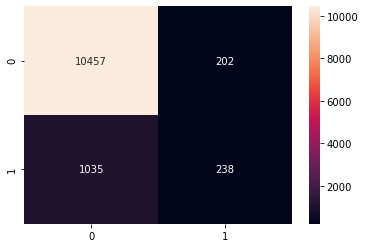

In [125]:
sns.heatmap(cm,annot=True,fmt='.0f');

In [126]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10659
           1       0.54      0.19      0.28      1273

    accuracy                           0.90     11932
   macro avg       0.73      0.58      0.61     11932
weighted avg       0.87      0.90      0.87     11932



In [127]:
fpr, tpr, threshold = roc_curve(y_test,y_test_prob_1)
roc_df = pd.DataFrame([fpr,tpr,threshold],index=['FPR','TPR','Threshold']).T

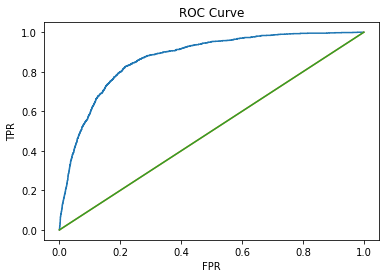

In [128]:
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve')
plt.show()

In [129]:
roc_auc_score(y_test,y_test_prob_1)

0.869642411138937

### For Cross Validation

In [130]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=log_reg,X=x_scaled,y=y,cv=k,scoring='recall')
np.mean(scores)

0.21275040284956653

In [131]:
recall_log_reg_without_SMOTE = scores

In [132]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=log_reg,X=x_scaled,y=y,cv=k,scoring='f1_weighted')
np.mean(scores)

0.8805047353323211

In [133]:
f1_weighted_log_reg_without_SMOTE = scores

In [134]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=log_reg,X=x_scaled,y=y,cv=k,scoring='roc_auc')
scores

array([0.87423508, 0.85595447, 0.86905096, 0.85954602, 0.87199465])

In [135]:
roc_auc_log_reg_without_SMOTE = scores

In [136]:
roc_auc = np.mean(scores)
roc_auc

0.8661562364059897

In [137]:
bias_error = 1 - np.mean(scores)
bias_error

0.1338437635940103

In [138]:
variance_error = np.std(scores,ddof=1) / np.abs(np.mean(scores))
variance_error

0.009227281972371677

### Base Model (with SMOTE)

### Using Logit Function

In [139]:
x_sm_scaled_const = sm.add_constant(x_sm_scaled)
logit_model = sm.Logit(y_sm,x_sm_scaled_const).fit()

Optimization terminated successfully.
         Current function value: 0.344014
         Iterations 7


In [140]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                53475
Model:                          Logit   Df Residuals:                    53459
Method:                           MLE   Df Model:                           15
Date:                Sat, 29 Jan 2022   Pseudo R-squ.:                  0.4595
Time:                        14:39:32   Log-Likelihood:                -18396.
converged:                       True   LL-Null:                       -34038.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.5566      0.097     57.493      0.000       5.367       5.746
age group             -0.3769      0.013    -28.680      0.000      -0.403      -0.351
job                   -0.0058      0.004     -1.310      0.190      -0.014       0.003
nuptial               -0.5775      0.024    -24.208      0.000      -0.624      -0.531
education             -0.2011      0.022     -9.345      0.000      -0.243      -0.159
defaulter_presence    -0.8533      0.151     -5.638      0.000      -1.150      -0.557
balance_amount         0.1986      0.013     15.241      0.000       0.173       0.224
house_loan            -2.2969      0.031    -73.383      0.000      -2.358      -2.236
personal_loan         -1.8308      0.059    -30.928      0.000      -1.947      -1.715
contact_via           -0.7575      0.075    -10.088      0.000      -0.905      -0.610
last_contact_day      -0.0118      0.002     -7.181      0.000      -0.015      -0.009
last_contact_month    -0.0632      0.005    -11.762      0.000      -0.074      -0.053
duration               1.3396      0.015     88.247      0.000       1.310       1.369
campaign              -0.2865      0.016    -18.423      0.000      -0.317      -0.256
passed_days           -1.1146      0.020    -55.581      0.000      -1.154      -1.075
previous_contact      -0.2826      0.018    -15.353      0.000      -0.319      -0.247
======================================================================================
"""

### Using Sklearn

In [141]:
log_reg = LogisticRegression()
log_reg.fit(x_sm_train,y_sm_train)

LogisticRegression()

In [142]:
y_sm_test_pred = log_reg.predict(x_sm_test)

In [143]:
y_sm_test_prob_1 = log_reg.predict_proba(x_sm_test)[:,1]

In [144]:
cm = confusion_matrix(y_sm_test,y_sm_test_pred)

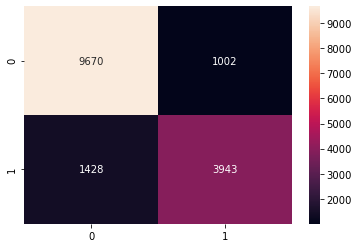

In [145]:
sns.heatmap(cm,annot=True,fmt='.0f');

In [146]:
print(classification_report(y_sm_test,y_sm_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     10672
           1       0.80      0.73      0.76      5371

    accuracy                           0.85     16043
   macro avg       0.83      0.82      0.83     16043
weighted avg       0.85      0.85      0.85     16043



In [147]:
fpr, tpr, threshold = roc_curve(y_sm_test,y_sm_test_prob_1)
roc_df = pd.DataFrame([fpr,tpr,threshold],index=['FPR','TPR','Threshold']).T

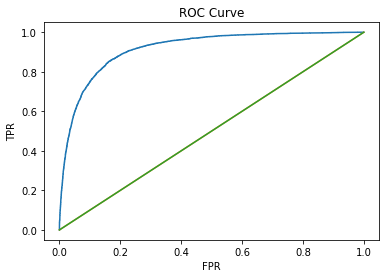

In [148]:
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve')
plt.show()

In [149]:
roc_auc_score(y_sm_test,y_sm_test_prob_1)

0.9165856875602415

### For Cross Validation

In [150]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=log_reg,X=x_sm_scaled,y=y_sm,cv=k,scoring='recall')
np.mean(scores)

0.7364733715684564

In [151]:
recall_log_reg_with_SMOTE = scores

In [152]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=log_reg,X=x_sm_scaled,y=y_sm,cv=k,scoring='f1_weighted')
np.mean(scores)

0.8501120747730193

In [153]:
f1_weighted_log_reg_with_SMOTE = scores

In [154]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=log_reg,X=x_sm_scaled,y=y_sm,cv=k,scoring='roc_auc')
np.mean(scores)

0.917026257789536

In [155]:
roc_auc_log_reg_with_SMOTE = scores

In [156]:
bias_error = 1 - np.mean(scores)
bias_error

0.08297374221046405

In [157]:
variance_error = np.std(scores,ddof=1) / np.abs(np.mean(scores))
variance_error

0.0029112919107948695

# 2) KNN Classifier:

### Base Model (with SMOTE)

In [158]:
knn = KNeighborsClassifier()
knn.fit(x_sm_train,y_sm_train)

KNeighborsClassifier()

In [159]:
y_sm_test_pred = knn.predict(x_sm_test)

In [160]:
y_sm_test_prob_1 = knn.predict_proba(x_sm_test)[:,1]

In [161]:
cm = confusion_matrix(y_sm_test,y_sm_test_pred)

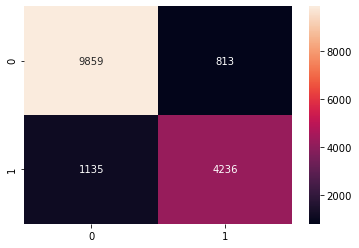

In [162]:
sns.heatmap(cm,annot=True,fmt='.0f');

In [163]:
print(classification_report(y_sm_test,y_sm_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     10672
           1       0.84      0.79      0.81      5371

    accuracy                           0.88     16043
   macro avg       0.87      0.86      0.86     16043
weighted avg       0.88      0.88      0.88     16043



In [164]:
fpr, tpr, threshold = roc_curve(y_sm_test,y_sm_test_prob_1)
roc_df = pd.DataFrame([fpr,tpr,threshold],index=['FPR','TPR','Threshold']).T

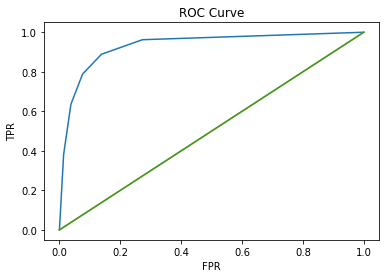

In [165]:
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve')
plt.show()

In [166]:
roc_auc_score(y_sm_test,y_sm_test_prob_1)

0.9322061384826112

### For Cross Validation

In [167]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=knn,X=x_sm_scaled,y=y_sm,cv=k,scoring='recall')
np.mean(scores)

0.797086714516787

In [168]:
recall_knn = scores

In [169]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=knn,X=x_sm_scaled,y=y_sm,cv=k,scoring='f1_weighted')
np.mean(scores)

0.8806832284794817

In [170]:
f1_weighted_knn = scores

In [171]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=knn,X=x_sm_scaled,y=y_sm,cv=k,scoring='roc_auc')
np.mean(scores)

0.9356686183913819

In [172]:
roc_auc_knn = scores

In [173]:
bias_error = 1 - np.mean(scores)
bias_error

0.06433138160861807

In [174]:
variance_error = np.std(scores,ddof=1) / np.abs(np.mean(scores))
variance_error

0.0017064692623328405

# 3) Random Forest:

### Base Model

In [175]:
rf = RandomForestClassifier(random_state=10)
params = {'max_depth':np.arange(1,18)}

k = KFold(n_splits=5,shuffle=True,random_state=10)
grid_cv = GridSearchCV(estimator=rf,param_grid=params,cv=k,scoring='roc_auc')
grid_cv.fit(x_sm_train,y_sm_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=RandomForestClassifier(random_state=10),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])},
             scoring='roc_auc')

In [176]:
grid_cv.best_params_

{'max_depth': 17}

In [177]:
rf = RandomForestClassifier(max_depth=17,random_state=10)
rf.fit(x_sm_train,y_sm_train)

RandomForestClassifier(max_depth=17, random_state=10)

In [178]:
y_sm_test_pred = rf.predict(x_sm_test)

In [179]:
y_sm_test_prob_1 = rf.predict_proba(x_sm_test)[:,1]

In [180]:
cm = confusion_matrix(y_sm_test,y_sm_test_pred)

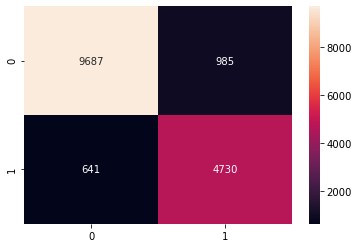

In [181]:
sns.heatmap(cm,annot=True,fmt='.0f');

In [182]:
print(classification_report(y_sm_test,y_sm_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92     10672
           1       0.83      0.88      0.85      5371

    accuracy                           0.90     16043
   macro avg       0.88      0.89      0.89     16043
weighted avg       0.90      0.90      0.90     16043



In [183]:
fpr, tpr, threshold = roc_curve(y_sm_test,y_sm_test_prob_1)
roc_df = pd.DataFrame([fpr,tpr,threshold],index=['FPR','TPR','Threshold']).T

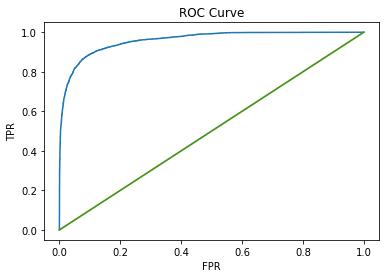

In [184]:
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve')
plt.show()

In [185]:
roc_auc_score(y_sm_test,y_sm_test_prob_1)

0.9599620194324732

### For Cross Validation

In [186]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=rf,X=x_sm_scaled,y=y_sm,cv=k,scoring='recall')
np.mean(scores)

0.8601518614821245

In [187]:
recall_rf = scores

In [188]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=rf,X=x_sm_scaled,y=y_sm,cv=k,scoring='f1_weighted')
np.mean(scores)

0.9204565056933569

In [189]:
f1_weighted_rf = scores

In [190]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=rf,X=x_sm_scaled,y=y_sm,cv=k,scoring='roc_auc')
np.mean(scores)

0.9758154446974301

In [191]:
roc_auc_rf = scores

In [192]:
bias_error = 1 - np.mean(scores)
bias_error

0.02418455530256991

In [193]:
variance_error = np.std(scores,ddof=1) / np.abs(np.mean(scores))
variance_error

0.0013100691442711127

# 4) AdaBoosting:

In [194]:
ada = AdaBoostClassifier(n_estimators=100,random_state=10)
ada.fit(x_sm_train,y_sm_train)

AdaBoostClassifier(n_estimators=100, random_state=10)

In [195]:
y_sm_test_pred = ada.predict(x_sm_test)

In [196]:
y_sm_test_prob_1 = ada.predict_proba(x_sm_test)[:,1]

In [197]:
cm = confusion_matrix(y_sm_test,y_sm_test_pred)

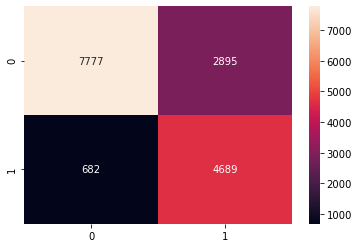

In [198]:
sns.heatmap(cm,annot=True,fmt='.0f');

In [199]:
print(classification_report(y_sm_test,y_sm_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81     10672
           1       0.62      0.87      0.72      5371

    accuracy                           0.78     16043
   macro avg       0.77      0.80      0.77     16043
weighted avg       0.82      0.78      0.78     16043



In [200]:
fpr, tpr, threshold = roc_curve(y_sm_test,y_sm_test_prob_1)
roc_df = pd.DataFrame([fpr,tpr,threshold],index=['FPR','TPR','Threshold']).T

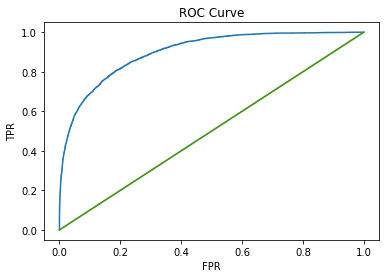

In [201]:
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve')
plt.show()

In [202]:
roc_auc_score(y_sm_test,y_sm_test_prob_1)

0.8995424962532697

### For Cross Validation

In [203]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=ada,X=x_sm_scaled,y=y_sm,cv=k,scoring='recall')
np.mean(scores)

0.808257490524845

In [204]:
recall_ada = scores

In [205]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=ada,X=x_sm_scaled,y=y_sm,cv=k,scoring='f1_weighted')
np.mean(scores)

0.8969396991290871

In [206]:
f1_weighted_ada = scores

In [207]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=ada,X=x_sm_scaled,y=y_sm,cv=k,scoring='roc_auc')
np.mean(scores)

0.9572871542738042

In [208]:
roc_auc_ada = scores

In [209]:
bias_error = 1 - np.mean(scores)
bias_error

0.042712845726195825

In [210]:
variance_error = np.std(scores,ddof=1) / np.abs(np.mean(scores))
variance_error

0.0024150101362774676

# 5) Gradient Boosting

In [211]:
gb = GradientBoostingClassifier(random_state=10)
gb.fit(x_sm_train,y_sm_train)

GradientBoostingClassifier(random_state=10)

In [212]:
y_sm_test_pred = gb.predict(x_sm_test)

In [213]:
y_sm_test_prob_1 = gb.predict_proba(x_sm_test)[:,1]

In [214]:
cm = confusion_matrix(y_sm_test,y_sm_test_pred)

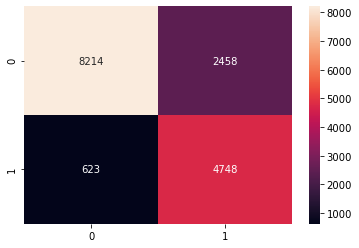

In [215]:
sns.heatmap(cm,annot=True,fmt='.0f');

In [216]:
print(classification_report(y_sm_test,y_sm_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84     10672
           1       0.66      0.88      0.76      5371

    accuracy                           0.81     16043
   macro avg       0.79      0.83      0.80     16043
weighted avg       0.84      0.81      0.81     16043



In [217]:
fpr, tpr, threshold = roc_curve(y_sm_test,y_sm_test_prob_1)
roc_df = pd.DataFrame([fpr,tpr,threshold],index=['FPR','TPR','Threshold']).T

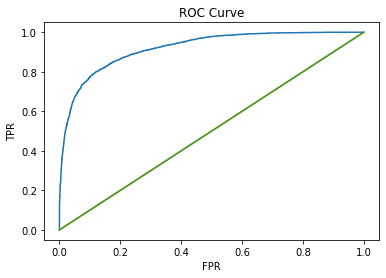

In [218]:
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve')
plt.show()

In [219]:
roc_auc_score(y_sm_test,y_sm_test_prob_1)

0.9199800409328012

### For Cross Validation

In [220]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=gb,X=x_sm_scaled,y=y_sm,cv=k,scoring='recall')
np.mean(scores)

0.8192854778661234

In [221]:
recall_gb = scores

In [222]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=gb,X=x_sm_scaled,y=y_sm,cv=k,scoring='f1_weighted')
np.mean(scores)

0.9031537190371737

In [223]:
f1_weighted_gb = scores

In [224]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=gb,X=x_sm_scaled,y=y_sm,cv=k,scoring='roc_auc')
np.mean(scores)

0.9656440899905345

In [225]:
roc_auc_gb = scores

In [226]:
bias_error = 1 - np.mean(scores)
bias_error

0.03435591000946547

In [227]:
variance_error = np.std(scores,ddof=1) / np.abs(np.mean(scores))
variance_error

0.0015148866814378497

In [228]:
pip install xgboost

# 6) XGB

In [229]:
xgb = XGBClassifier(verbosity=0,random_state=100)
params = {'max_depth':np.arange(1,18)}

k = KFold(n_splits=5,shuffle=True,random_state=10)
grid_cv = GridSearchCV(estimator=xgb,param_grid=params,cv=k,scoring='roc_auc')
grid_cv.fit(x_sm_train,y_sm_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=100, reg_alpha=None,
                        

In [230]:
grid_cv.best_params_

{'max_depth': 10}

In [231]:
xgb = XGBClassifier(max_depth=13,verbosity=0,random_state=100)
xgb.fit(x_sm_train,y_sm_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=13, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [232]:
y_sm_test_pred = xgb.predict(x_sm_test)

In [233]:
y_sm_test_prob_1 = xgb.predict_proba(x_sm_test)[:,1]

In [234]:
cm = confusion_matrix(y_sm_test,y_sm_test_pred)

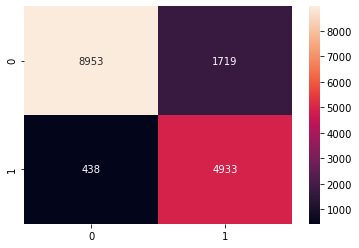

In [235]:
sns.heatmap(cm,annot=True,fmt='.0f');

In [236]:
print(classification_report(y_sm_test,y_sm_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89     10672
           1       0.74      0.92      0.82      5371

    accuracy                           0.87     16043
   macro avg       0.85      0.88      0.86     16043
weighted avg       0.88      0.87      0.87     16043



In [237]:
fpr, tpr, threshold = roc_curve(y_sm_test,y_sm_test_prob_1)
roc_df = pd.DataFrame([fpr,tpr,threshold],index=['FPR','TPR','Threshold']).T

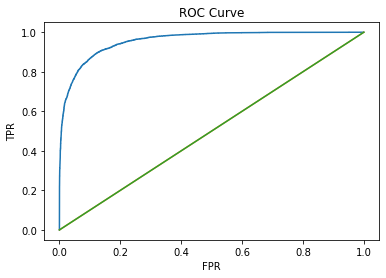

In [238]:
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve')
plt.show()

In [239]:
roc_auc_score(y_sm_test,y_sm_test_prob_1)

0.9573351735275539

### For Cross Validation

In [240]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=xgb,X=x_sm_scaled,y=y_sm,cv=k,scoring='recall')
np.mean(scores)

0.8842639415808599

In [241]:
recall_xgb = scores

In [242]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=xgb,X=x_sm_scaled,y=y_sm,cv=k,scoring='f1_weighted')
np.mean(scores)

0.9307050990436754

In [243]:
f1_weighted_xgb = scores

In [244]:
k = KFold(n_splits=5,shuffle=True,random_state=10)
scores = cross_val_score(estimator=xgb,X=x_sm_scaled,y=y_sm,cv=k,scoring='roc_auc')
np.mean(scores)

0.9803923888238959

In [245]:
roc_auc_xgb = scores

In [246]:
bias_error = 1 - np.mean(scores)
bias_error

0.0196076111761041

In [247]:
variance_error = np.std(scores,ddof=1) / np.abs(np.mean(scores))
variance_error

0.0010060858806078094

In [248]:
names = ['log_reg_without_SMOTE','log_reg_with_smote','knn','rf','ada','gb','xgb','stack_cls','vc']

In [249]:
results_recall_1 = pd.DataFrame()

results_recall_1['recall'] = recall_log_reg_without_SMOTE
results_recall_1['Models'] = 'log_reg_without_SMOTE'


results_recall_1.reset_index(drop=True,inplace=True)

In [250]:
results_recall_1

,recall,Models
0,0.209964,log_reg_without_SMOTE
1,0.184242,log_reg_without_SMOTE
2,0.208805,log_reg_without_SMOTE
3,0.225728,log_reg_without_SMOTE
4,0.235012,log_reg_without_SMOTE


In [251]:
results_recall_2 = pd.DataFrame()

results_recall_2['recall'] = recall_log_reg_with_SMOTE
results_recall_2['Models'] = 'log_reg_with_SMOTE'

results_recall_3 = pd.DataFrame()
results_recall_3['recall'] = recall_knn
results_recall_3['Models'] = 'knn'

results_recall_4 = pd.DataFrame()
results_recall_4['recall'] = recall_rf
results_recall_4['Models'] = 'rf'

results_recall_5 = pd.DataFrame()
results_recall_5['recall'] = recall_ada
results_recall_5['Models'] = 'ada'

results_recall_6 = pd.DataFrame()
results_recall_6['recall'] = recall_gb
results_recall_6['Models'] = 'gb'

results_recall_7 = pd.DataFrame()
results_recall_7['recall'] = recall_xgb
results_recall_7['Models'] = 'xgb'


In [252]:
results_box = pd.concat([results_recall_1,results_recall_2,results_recall_3,results_recall_4,
                        results_recall_5,results_recall_6,results_recall_7,])

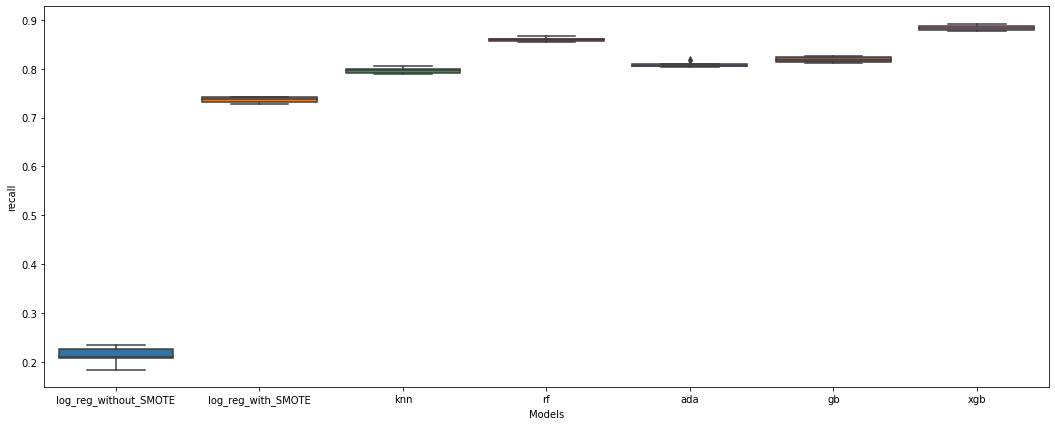

In [253]:
plt.figure(figsize=(18,7))
sns.boxplot(x=results_box['Models'],y=results_box['recall']);

# Overall Inference

In [254]:
results_df = pd.DataFrame()

In [255]:
results_df['recall_score'] = [0.22,0.76,0.81,0.87,0.81,0.82,0.88]
results_df['f1_weighted'] = [0.88,0.86,0.88,0.92,0.90,0.91,0.93]
results_df['roc_auc (%)'] = [87.28,92.80,93.58,97.65,95.89,96.72,98.07]
results_df['bias_error %(roc_auc)'] = [12.72,7.20,6.42,2.35,4.11,3.28,1.93]
results_df['variance_error %(roc_auc)'] = [0.83,0.33,0.23,0.16,0.27,0.17,0.11]

In [256]:
results_df.index = ['Logistic Regression (without SMOTE)','Logistic Regression (with SMOTE)',
                   'KNN Classifier','Randm Forest','AdaBoost','Gradient Boost',
                    'XGB']

In [257]:
results_df

,recall_score,f1_weighted,roc_auc (%),bias_error %(roc_auc),variance_error %(roc_auc)
Logistic Regression (without SMOTE),0.22,0.88,87.28,12.72,0.83
Logistic Regression (with SMOTE),0.76,0.86,92.80,7.20,0.33
KNN Classifier,0.81,0.88,93.58,6.42,0.23
Randm Forest,0.87,0.92,97.65,2.35,0.16
AdaBoost,0.81,0.90,95.89,4.11,0.27
Gradient Boost,0.82,0.91,96.72,3.28,0.17
XGB,0.88,0.93,98.07,1.93,0.11


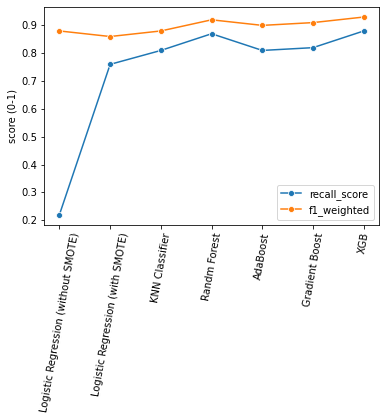

In [258]:
sns.lineplot(x=results_df.index,y=results_df['recall_score'],marker='o',label='recall_score')
sns.lineplot(x=results_df.index,y=results_df['f1_weighted'],marker='o',label='f1_weighted')
plt.ylabel('score (0-1)')
plt.xticks(rotation=80);

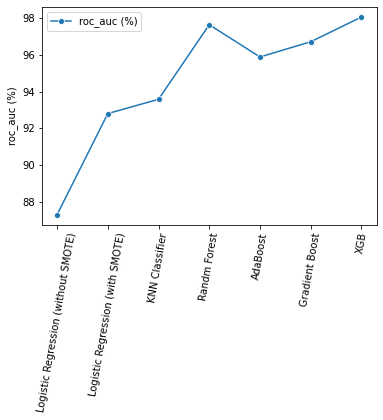

In [259]:
sns.lineplot(x=results_df.index,y=results_df['roc_auc (%)'],marker='o',label='roc_auc (%)')
plt.xticks(rotation=80);

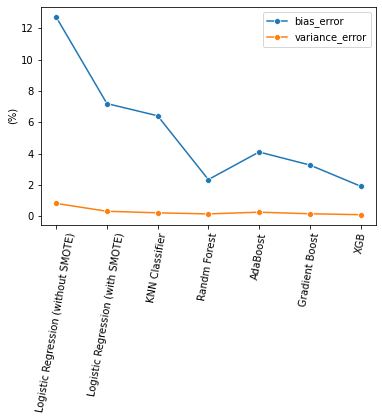

In [260]:
sns.lineplot(x=results_df.index,y=results_df['bias_error %(roc_auc)'],marker='o',label='bias_error')
sns.lineplot(x=results_df.index,y=results_df['variance_error %(roc_auc)'],marker='o',label='variance_error')
plt.ylabel('(%)')
plt.xticks(rotation=80);

# Feature Importance:

In [261]:
features_df = pd.DataFrame()
features_df['Importance'] = xgb.feature_importances_
features_df.index = x_sm.columns

features_df = features_df.sort_values('Importance',ascending=False)

In [262]:
features_df

,Importance
house_loan,0.408025
passed_days,0.222687
personal_loan,0.099045
previous_contact,0.044232
campaign,0.042477
duration,0.037609
contact_via,0.032615
last_contact_month,0.026746
age group,0.014865
last_contact_day,0.014466


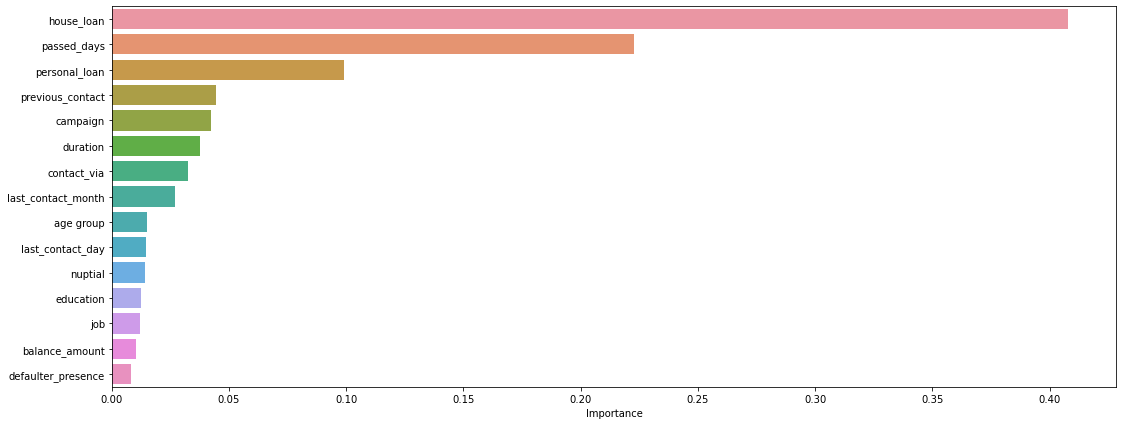

In [263]:
plt.figure(figsize=(18,7))
sns.barplot(x=features_df['Importance'],y=features_df.index);

# Done !!! (Refer Report and PPT for Overall Inference)